In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
def load_dataset():
    try:
        df_train = pd.read_csv('train.csv', encoding='utf-8')
        df_test = pd.read_csv('test.csv', encoding='utf-8')
        return df_train, df_test
    except Exception as e:
        print('FileNotFound: ', e)

df_train, df_test = load_dataset()

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [9]:
df_test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704   
std       1.113740    30.390071     21.130467   177.625900   455.268042   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1458.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean     52.619342   554.294925  1046.117970  1156.534613   325.967786   
std     176.753926   437.260486   442.898624   398.165820   420.610226   
min       0.000000     0.000000     0.000000   407.000000     0.000000   
25%       0.000000   219.250000   784.000000   873.500000     0.000000   
50%       0.000000   460.000000   988.000000  1079.000000     0.000000   
75%       0.000000   797.750000  1305.000000  1382.500000   676.000000   
max    1526.000000  2140.000000  5095.000000  5095.000000  1862.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1459.000000  1459.000000   1457.000000   1457.000000  1459.000000   
mean       3.543523  1486.045922      0.434454      0.065202     1.570939   
std       44.043251   485.566099      0.530648      0.252468     0.555190   
min        0.000000   407.000000      0.000000      0.000000     0.000000   
25%        0.000000  1117.500000      0.000000      0.000000     1.000000   
50%        0.000000  1432.000000      0.000000      0.000000     2.000000   
75%        0.000000  1721.000000      1.000000      0.000000     2.000000   
max     1064.000000  5095.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
count  1459.000000   1459.000000   1459.000000   1459.000000  1459.00000   
mean      0.377656      2.854010      1.042495      6.385195     0.58122   
std       0.503017      0.829788      0.208472      1.508895     0.64742   
min       0.000000      0.000000      0.000000      3.000000     0.00000   
25%       0.000000      2.000000      1.000000      5.000000     0.00000   
50%       0.000000      3.000000      1.000000      6.000000     0.00000   
75%       1.000000      3.000000      1.000000      7.000000     1.00000   
max       2.000000      6.000000      2.000000     15.000000     4.00000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1381.000000  1458.000000  1458.000000  1459.000000  1459.000000   
mean   1977.721217     1.766118   472.768861    93.174777    48.313914   
std      26.431175     0.775945   217.048611   127.744882    68.883364   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1959.000000     1.000000   318.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    28.000000   
75%    2002.000000     2.000000   576.000000   168.000000    72.000000   
max    2207.000000     5.0

In [10]:
df_train = df_train.drop("Id", axis=1)
df_test = df_test.drop("Id", axis=1)

In [11]:
def correlation(data):
    df_corr = data.corr(numeric_only=True)
    plt.figure(figsize=(28,18))
    sns.heatmap(df_corr, annot=True, cmap="summer", annot_kws={"size": 10});

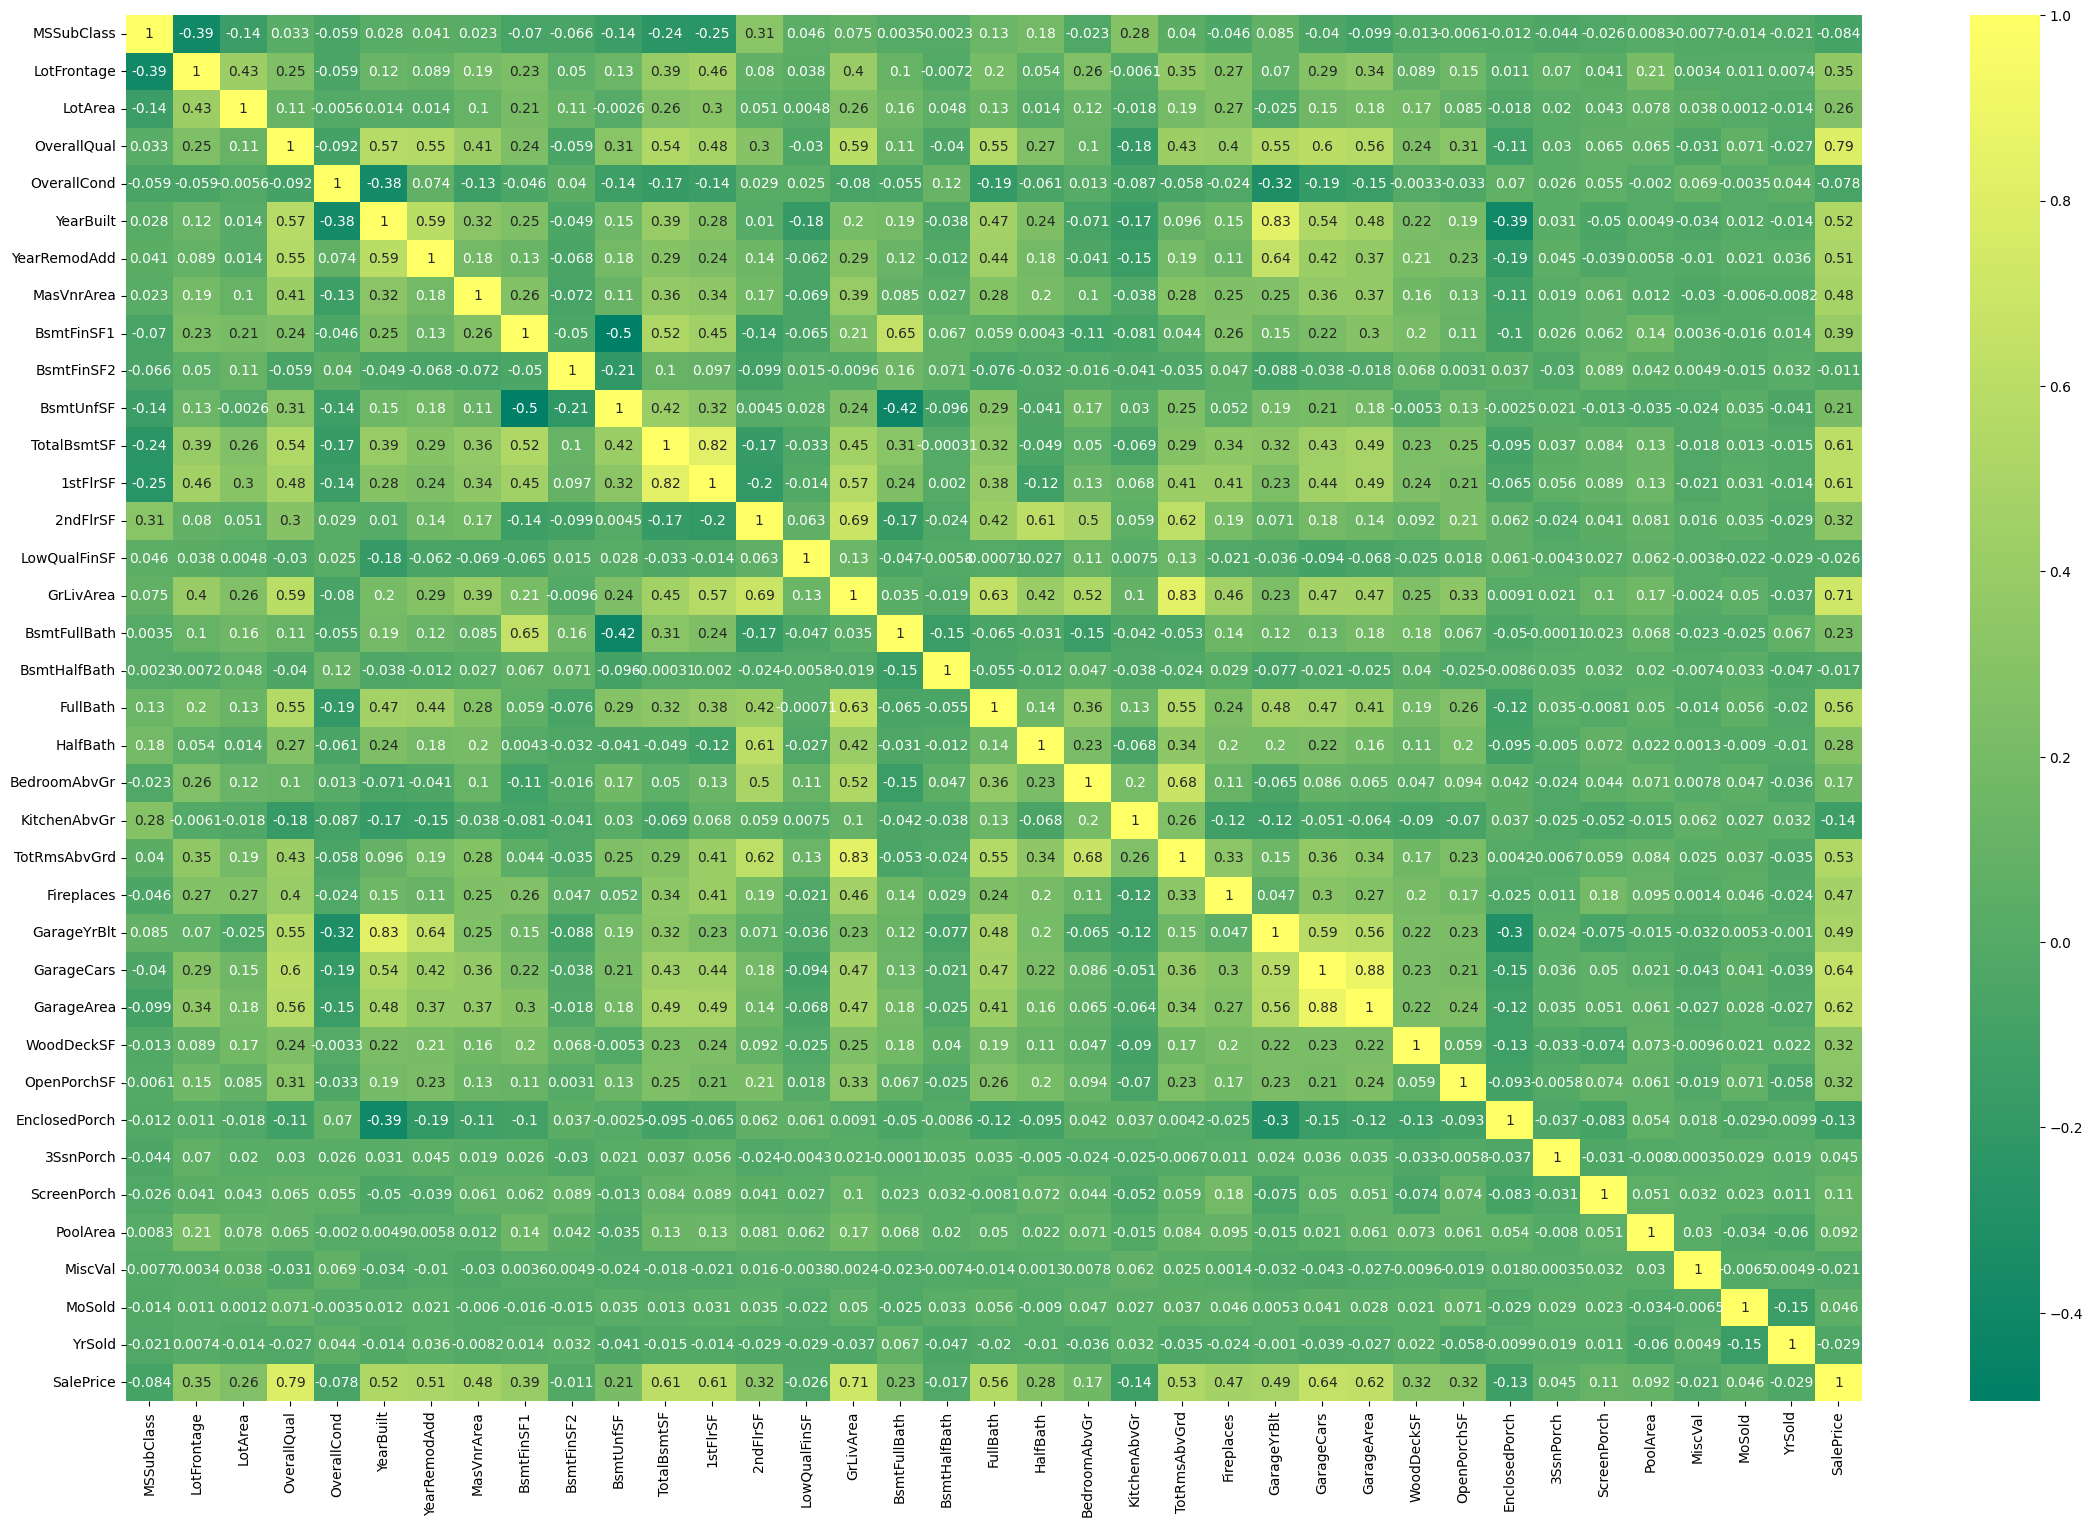

In [12]:
correlation(df_train)

Train Data:

GarageCars and GarageArea = 0.88 
YearBuilt and GarageYrBlt = 0.83 
TotalRmsAbvGrd and GrLivArea = 0.83
TotalBsmtSF and 1stFlrSF = 0.82 


are highly correlated to each other


In [13]:
train_corr_list = df_train.corr(numeric_only=True)['SalePrice'].sort_values(ascending=True)
train_corr_list

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

Highly Positive correlated.

1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982


Negative Correlated features:

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856

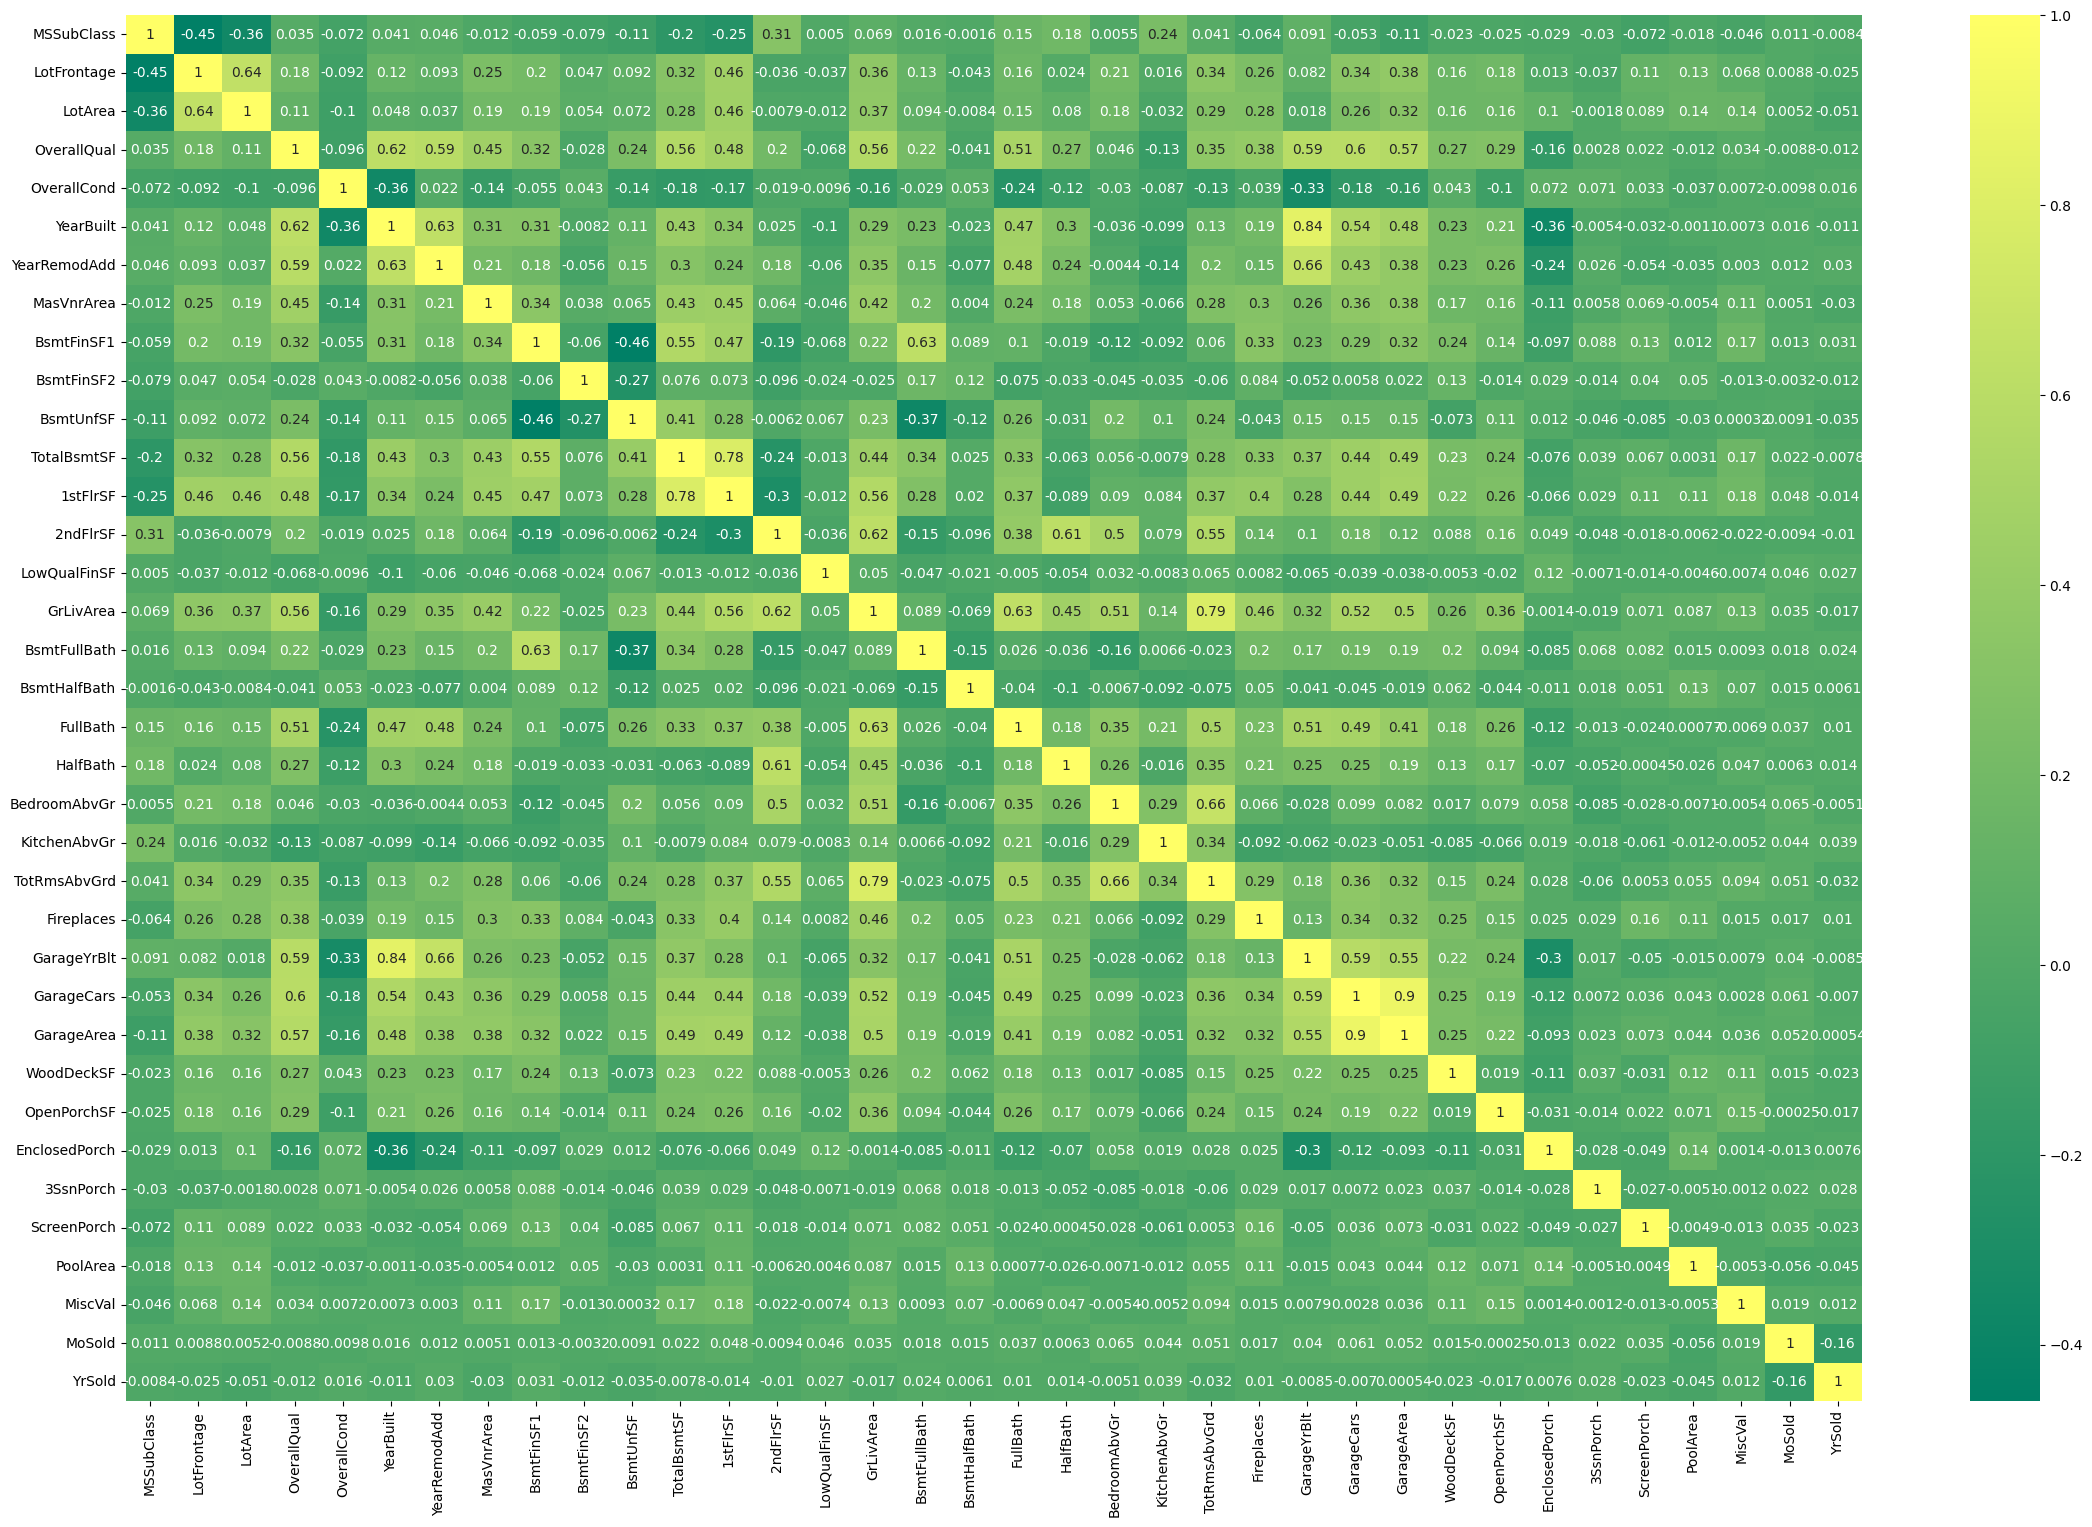

In [14]:
correlation(df_test)

Test Data:

GarageCars and GarageArea = 0.9
GaragerYrBlt and YearBuilt = 0.84

<Axes: xlabel='SalePrice', ylabel='Count'>

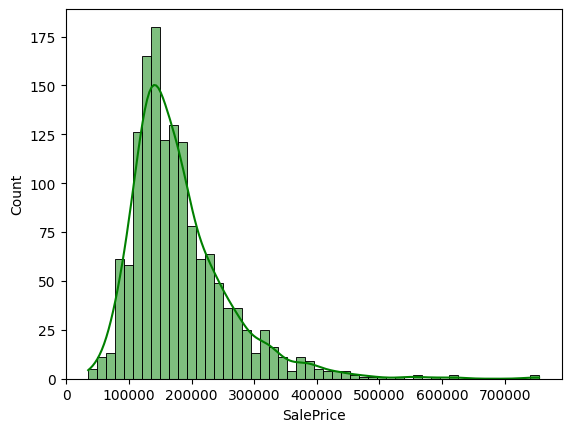

In [15]:
sns.histplot(df_train['SalePrice'], kde=True, color="Green", bins=50)

In [16]:
df_train['PriceRange'] = pd.qcut(df_train['SalePrice'], q=5, labels=False)

In [17]:
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

In [18]:
X

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1455          60       RL         62.0     7917   Pave   NaN      Reg   
1456          20       RL         85.0    13175   Pave   NaN      Reg   
1457          70       RL         66.0     9042   Pave   NaN      Reg   
1458          20       RL         68.0     9717   Pave   NaN      Reg   
1459          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   
4          350.0        Gd        TA      PConc       Gd       TA   


In [19]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=df_train['PriceRange'])

In [21]:
X_test.shape, y_test.shape

((438, 80), (438,))

In [22]:
X_train.shape

(1022, 80)

In [23]:
X_test.shape

(438, 80)

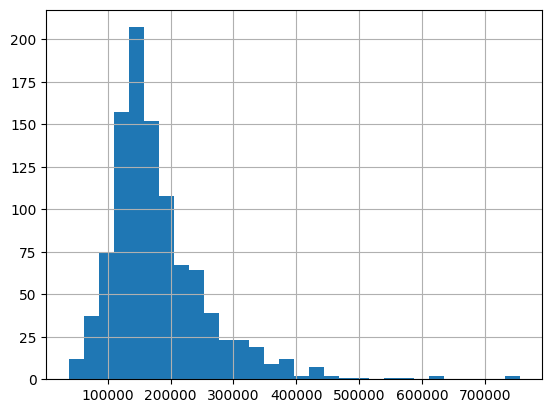

In [24]:
y_train.hist(bins=30);

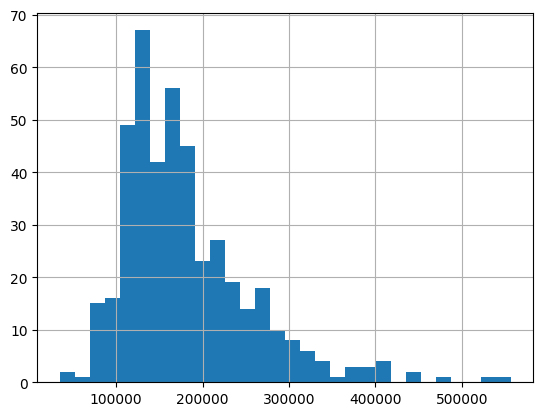

In [25]:
y_test.hist(bins=30);

In [26]:
df = X_train.copy()
df.head(10)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
800           60       RL         79.0    12798   Pave   NaN      IR1   
421           20       RL          NaN    16635   Pave   NaN      IR1   
1353          50       RL         56.0    14720   Pave   NaN      IR1   
676           70       RM         60.0     9600   Pave  Grvl      Reg   
1091         160       FV         24.0     2160   Pave  Pave      Reg   
777           20       RL        100.0    13350   Pave   NaN      IR1   
210           30       RL         67.0     5604   Pave   NaN      Reg   
1129          90       RM         60.0     7200   Pave  Grvl      Reg   
22            20       RL         75.0     9742   Pave   NaN      Reg   
637          190       RM         50.0     6000   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
800          HLS    AllPub    Inside       Mod      ClearCr      Feedr   
421          Lvl    AllPub       FR2       Gtl       NWAmes       Norm   
1353         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
676          Lvl    AllPub    Inside       Gtl      OldTown       Norm   
1091         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
777          Lvl    AllPub    Inside       Gtl       Sawyer       Norm   
210          Lvl    AllPub    Inside       Gtl      Edwards       Norm   
1129         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
22           Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
637          Lvl    AllPub    Inside       Gtl      OldTown       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
800        Norm     1Fam     2Story            6            5       1997   
421        Norm     1Fam     1Story            6            7       1977   
1353       Norm     1Fam     1.5Fin            8            5       1995   
676        Norm     1Fam     2Story            4            2       1900   
1091       Norm    Twnhs     2Story            7            5       1999   
777        Norm     1Fam     1Story            5            5       1974   
210        Norm     1Fam     1Story            5            6       1925   
1129       Norm   Duplex     SFoyer            5            5       1980   
22         Norm     1Fam     1Story            8            5       2002   
637        Norm   2fmCon     1.5Fin            5            4       1954   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
800           1997     Gable  CompShg     VinylSd     VinylSd        NaN   
421           2000     Gable  CompShg     CemntBd     CmentBd      Stone   
1353          1996       Hip  CompShg     VinylSd     VinylSd    BrkFace   
676           1950     Gable  CompShg     AsbShng      Stucco        NaN   
1091          2000     Gable  CompShg     MetalSd     MetalSd    BrkFace   
777           1974       Hip  CompShg     HdBoard     Plywood        NaN   
210           1950     Gable  CompShg      Stucco      Stucco        NaN   
1129          1980     Gable  CompShg     MetalSd     MetalSd    BrkFace   
22            2002       Hip  CompShg     VinylSd     VinylSd    BrkFace   
637           1954     Gable  CompShg     Wd Sdng     Wd Sdng        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
800          0.0        TA        TA      PConc       Gd       TA   
421        126.0        Gd        TA     CBlock       Gd       TA   
1353       579.0        Gd        TA      PConc       Gd       TA   
676          0.0        TA        TA     BrkTil       TA       Fa   
1091       212.0        Gd        TA      PConc       Gd       TA   
777          0.0        TA        TA     CBlock       TA       TA   
210          0.0        TA        TA     CBlock       TA       TA   
1129       180.0        TA        TA     CBlock       Gd       TA   
22         281.0        Gd        TA      PConc       Gd       TA   
637          0.0       

In [27]:
# Check null values in the dataset
def check_null(dataframe):
    count = 0
    for col in dataframe.columns:
        if dataframe[col].isnull().sum() > 0:
            print(f'{col} of type {dataframe[col].dtype} with {dataframe[col].isnull().sum()} null values i.e., {round(dataframe[col].isnull().sum() / len(dataframe) * 100, 2)}%')
            count += 1
    print(f'{count} columns have null values')

check_null(df)

LotFrontage of type float64 with 172 null values i.e., 16.83%
Alley of type object with 948 null values i.e., 92.76%
MasVnrType of type object with 616 null values i.e., 60.27%
MasVnrArea of type float64 with 6 null values i.e., 0.59%
BsmtQual of type object with 26 null values i.e., 2.54%
BsmtCond of type object with 26 null values i.e., 2.54%
BsmtExposure of type object with 27 null values i.e., 2.64%
BsmtFinType1 of type object with 26 null values i.e., 2.54%
BsmtFinType2 of type object with 27 null values i.e., 2.64%
Electrical of type object with 1 null values i.e., 0.1%
FireplaceQu of type object with 494 null values i.e., 48.34%
GarageType of type object with 64 null values i.e., 6.26%
GarageYrBlt of type float64 with 64 null values i.e., 6.26%
GarageFinish of type object with 64 null values i.e., 6.26%
GarageQual of type object with 64 null values i.e., 6.26%
GarageCond of type object with 64 null values i.e., 6.26%
PoolQC of type object with 1019 null values i.e., 99.71%
Fence

In [28]:
df_num = df.select_dtypes(include=['int', 'float'])
df_obj = df.select_dtypes(include='object')

In [29]:
len(df_num.columns), len(df_obj.columns)

(37, 43)

In [30]:
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
800           60         79.0    12798            6            5       1997   
421           20          NaN    16635            6            7       1977   
1353          50         56.0    14720            8            5       1995   
676           70         60.0     9600            4            2       1900   
1091         160         24.0     2160            7            5       1999   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
800           1997         0.0         462           0        154   
421           2000       126.0        1246           0        356   
1353          1996       579.0         816           0       1217   
676           1950         0.0           0           0       1095   
1091          2000       212.0         510           0         90   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
800           616       616      1072             0       1688             1   
421          1602      1602         0             0       1602             0   
1353         2033      2053      1185             0       3238             1   
676          1095      1095       679             0       1774             1   
1091          600       624       628             0       1252             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
800              0         2         1             4             1   
421              1         2         0             3             1   
1353             0         2         1             4             1   
676              0         2         0             4             2   
1091             0         2         1             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
800              8           0       1997.0           2         603   
421              8           1       1977.0           2         529   
1353             9           1       1996.0           3         666   
676              8           0       1920.0           3         779   
1091             4           0       1999.0           2         462   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
800          403          114            185          0            0   
421          240            0              0          0            0   
1353         283           86              0          0            0   
676            0            0             90          0            0   
1091           0           48              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  PriceRange  
800          0      400       5    2008           3  
421          0        0       6    2009           3  
1353         0        0       3    2010           4  
676          0        0       5    2006           0  
1091         0        0       3    2008           2

In [31]:
df_obj.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
800        RL   Pave   NaN      IR1         HLS    AllPub    Inside       Mod   
421        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
1353       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
676        RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1091       FV   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
800       ClearCr      Feedr       Norm     1Fam     2Story     Gable   
421        NWAmes       Norm       Norm     1Fam     1Story     Gable   
1353      NoRidge       Norm       Norm     1Fam     1.5Fin       Hip   
676       OldTown       Norm       Norm     1Fam     2Story     Gable   
1091      Somerst       Norm       Norm    Twnhs     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
800   CompShg     VinylSd     VinylSd        NaN        TA        TA   
421   CompShg     CemntBd     CmentBd      Stone        Gd        TA   
1353  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
676   CompShg     AsbShng      Stucco        NaN        TA        TA   
1091  CompShg     MetalSd     MetalSd    BrkFace        Gd        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
800       PConc       Gd       TA           Gd          GLQ          Unf   
421      CBlock       Gd       TA           No          ALQ          Unf   
1353      PConc       Gd       TA           Av          GLQ          Unf   
676      BrkTil       TA       Fa           No          Unf          Unf   
1091      PConc       Gd       TA           No          BLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
800     GasA        Gd          Y      SBrkr          Gd        Typ   
421     GasA        Gd          Y      SBrkr          Gd        Typ   
1353    GasA        Ex          Y      SBrkr          Gd        Typ   
676     GasW        Fa          N      SBrkr          TA       Min2   
1091    GasA        Ex          Y      SBrkr          Gd        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
800          NaN     Attchd          RFn         TA         TA          Y   
421           TA     Attchd          Fin         TA         TA          Y   
1353          Ex     Attchd          Fin         TA         TA          Y   
676          NaN     2Types          Unf         Fa         Fa          N   
1091         NaN     Detchd          Unf         TA         TA          Y   

     PoolQC Fence MiscFeature SaleType SaleCondition  
800     NaN   NaN        Shed       WD        Normal  
421     NaN   NaN         NaN       WD        Normal  
1353    NaN   NaN         NaN       WD        Normal  
676     NaN   NaN         NaN       WD        Normal  
1091    NaN   NaN         NaN       WD        Normal

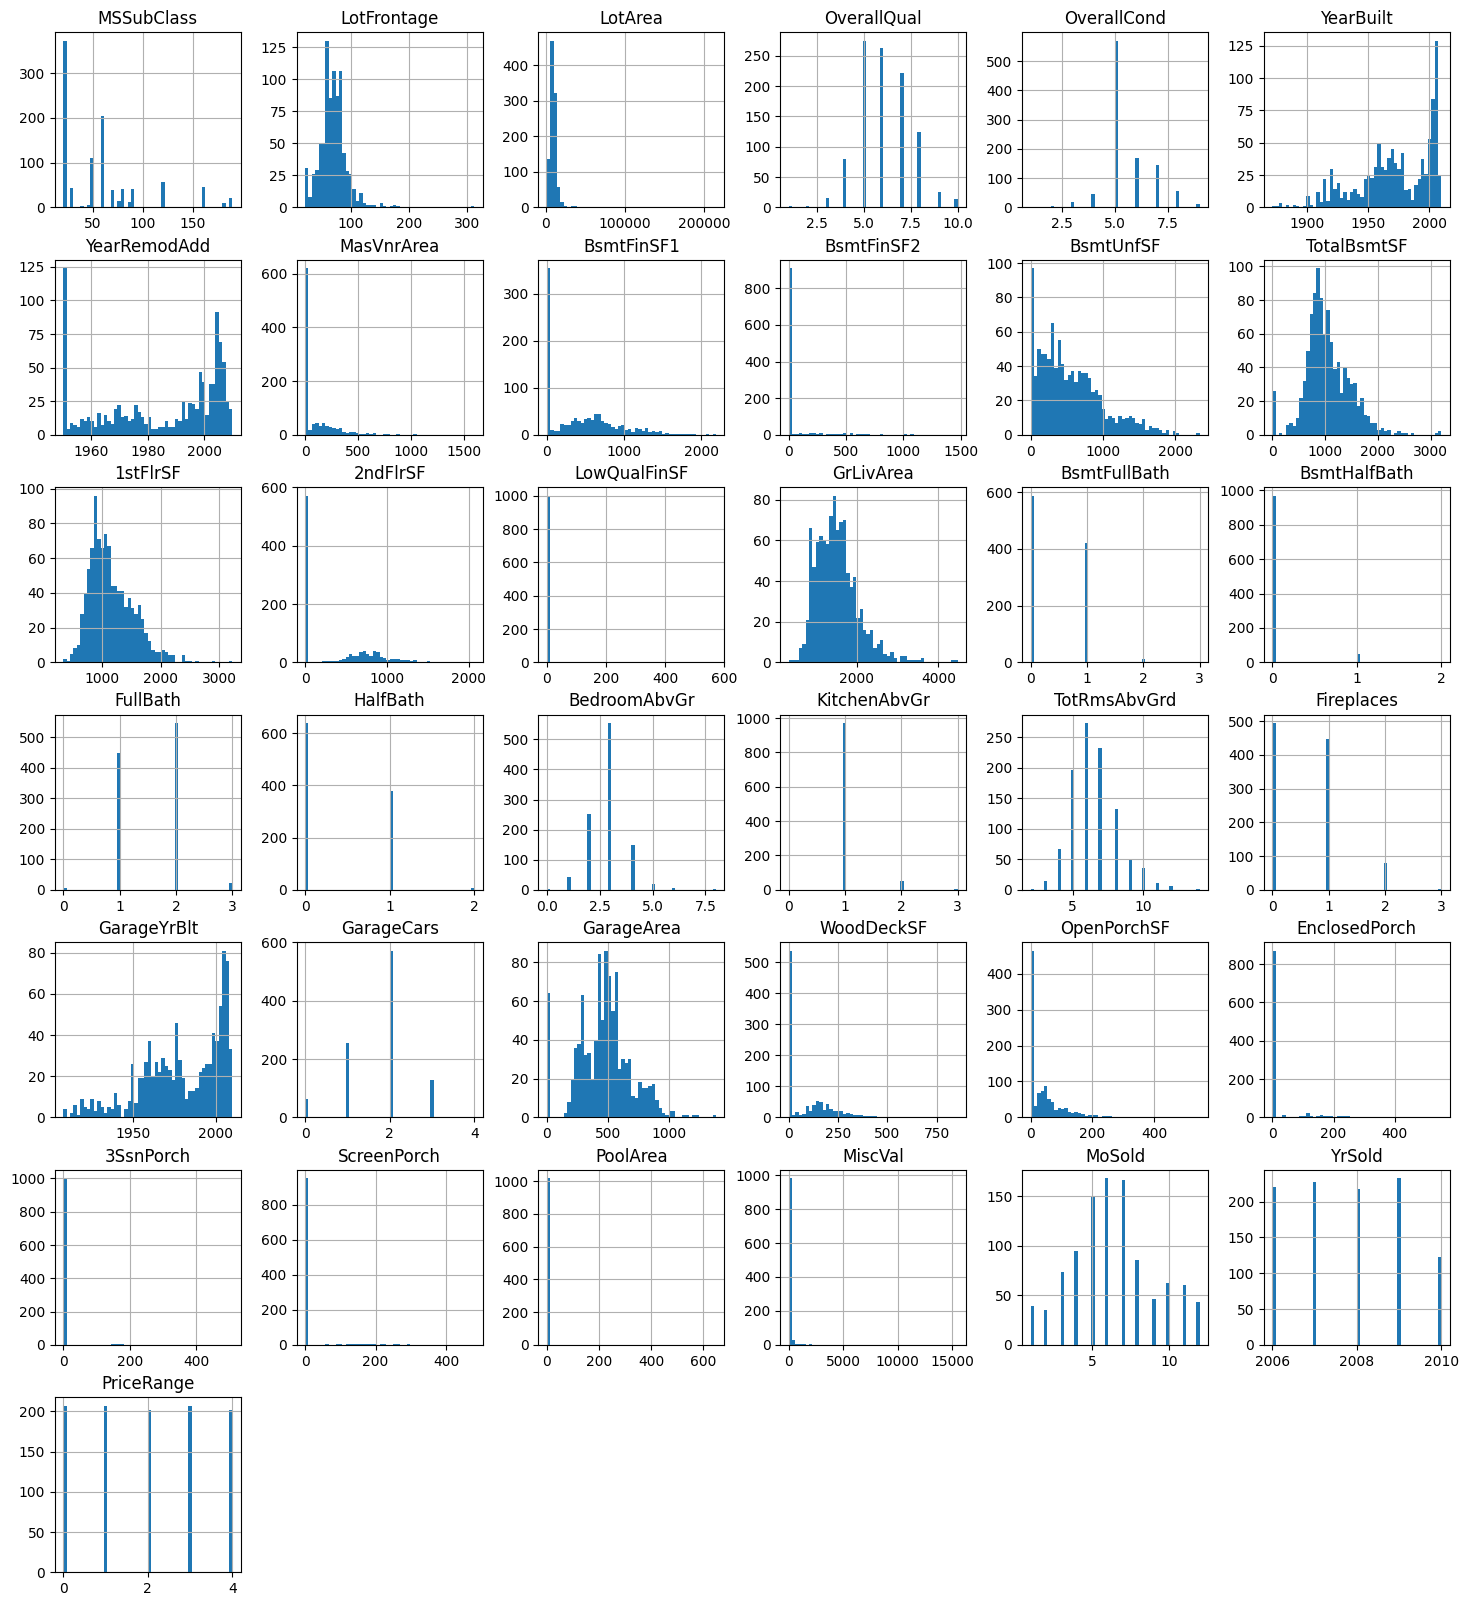

In [32]:
# Check numerical variables distributions
df_num.hist(bins=50, figsize=(18,20));

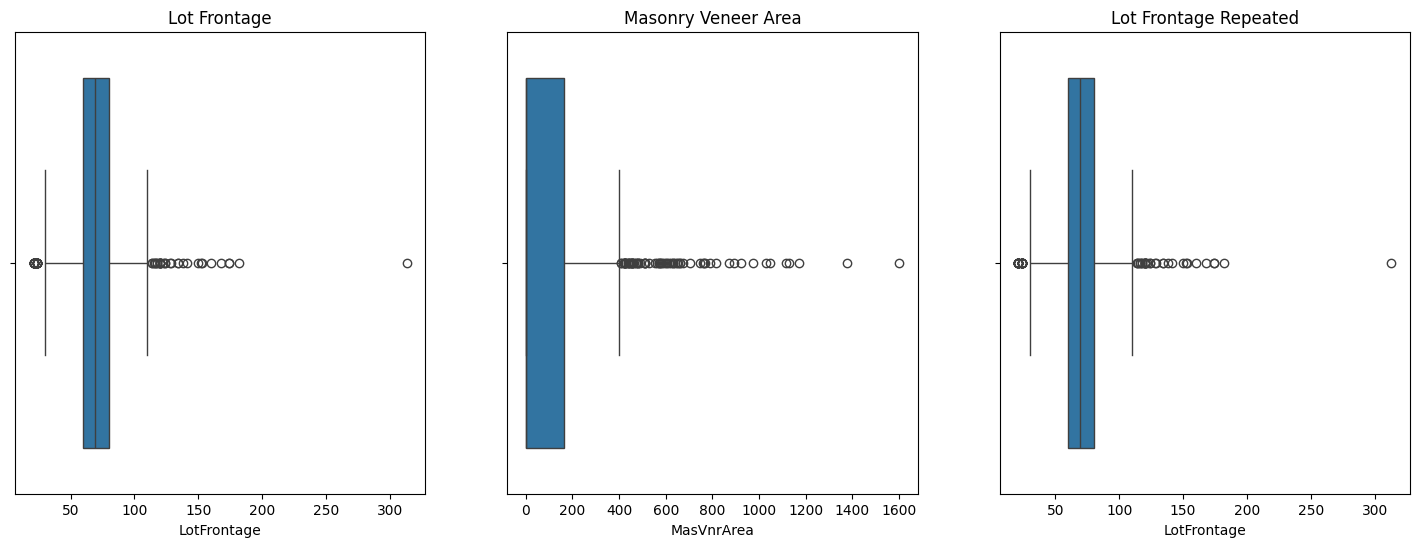

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  

sns.boxplot(x=df['LotFrontage'], ax=ax1)  
ax1.set_title('Lot Frontage')

sns.boxplot(x=df['MasVnrArea'], ax=ax2)  
ax2.set_title('Masonry Veneer Area') 

sns.boxplot(x=df['LotFrontage'], ax=ax3)  
ax3.set_title('Lot Frontage Repeated')  

plt.show()

In [34]:
df_num[df_num.LotFrontage.isnull()]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
421           20          NaN    16635            6            7       1977   
1358         160          NaN     2117            6            5       2000   
426           80          NaN    12800            7            5       1989   
191           60          NaN     7472            7            9       1972   
1018          80          NaN    10784            7            5       1991   
...          ...          ...      ...          ...          ...        ...   
518           60          NaN     9531            6            5       1998   
859           60          NaN    11029            6            7       1968   
714           60          NaN    13517            6            8       1976   
249           50          NaN   159000            6            7       1958   
816           20          NaN    11425            5            6       1954   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
421           2000       126.0        1246           0        356   
1358          2000       216.0         378           0        378   
426           1989       145.0        1518           0          0   
191           2004       138.0         626           0         99   
1018          1992        76.0           0           0        384   
...            ...         ...         ...         ...        ...   
518           1998         0.0         706           0         88   
859           1984       220.0         619           0        435   
714           2005       289.0         533           0        192   
249           2006       472.0         697           0        747   
816           1954         0.0         486           0        522   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
421          1602      1602         0             0       1602             0   
1358          756       769       804             0       1573             0   
426          1518      1644         0             0       1644             1   
191           725       725       754             0       1479             1   
1018          384       802       670             0       1472             0   
...           ...       ...       ...           ...        ...           ...   
518           794       882       914             0       1796             1   
859          1054      1512      1142             0       2654             1   
714           725       725       754             0       1479             0   
249          1444      1444       700             0       2144             0   
816          1008      1008         0             0       1008             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
421              1         2         0             3             1   
1358             0         2         1             3             1   
426              1         2         0             2             1   
191              0         1         1             4             1   
1018             0         2         1             3             1   
...            ...       ...       ...           ...           ...   
518              0         2         1             3             1   
859              0         2         1             4             1   
714              0         2         1             3             1   
249              1         2         0             4             1   
816              0         1         0             2             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
421              8           1       1977.0           2         529   
1358             5           0       2000.0           2         440   
426              5           1       1989.0           2         569   
191              7           0       1972.0           2         484   
1018             7           1       1991.0           2         402   


In [35]:
df_num[~df_num.LotFrontage.isnull()]

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
800           60         79.0    12798            6            5       1997   
1353          50         56.0    14720            8            5       1995   
676           70         60.0     9600            4            2       1900   
1091         160         24.0     2160            7            5       1999   
777           20        100.0    13350            5            5       1974   
...          ...          ...      ...          ...          ...        ...   
1092          50         60.0     8400            6            5       1925   
606           20         82.0    12464            5            5       1996   
94            60         69.0     9337            6            5       1997   
396           20         60.0     7200            5            5       1972   
389           60         96.0    12474           10            5       2007   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
800           1997         0.0         462           0        154   
1353          1996       579.0         816           0       1217   
676           1950         0.0           0           0       1095   
1091          2000       212.0         510           0         90   
777           1974         0.0         762           0        102   
...            ...         ...         ...         ...        ...   
1092          1950         0.0         423           0        758   
606           1996         0.0         732           0        308   
94            1997         0.0         648           0        176   
396           1972         0.0         777           0        117   
389           2008       272.0        1280           0        402   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
800           616       616      1072             0       1688             1   
1353         2033      2053      1185             0       3238             1   
676          1095      1095       679             0       1774             1   
1091          600       624       628             0       1252             1   
777           864       894         0             0        894             1   
...           ...       ...       ...           ...        ...           ...   
1092         1181      1390       304             0       1694             0   
606          1040      1040         0             0       1040             1   
94            824       905       881             0       1786             1   
396           894       894         0             0        894             0   
389          1682      1742       590             0       2332             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
800              0         2         1             4             1   
1353             0         2         1             4             1   
676              0         2         0             4             2   
1091             0         2         1             2             1   
777              0         1         0             3             1   
...            ...       ...       ...           ...           ...   
1092             0         2         0             4             1   
606              0         1         0             3             1   
94               0         2         1             3             1   
396              0         1         0             2             1   
389              0         2         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  \
800              8           0       1997.0           2         603   
1353             9           1       1996.0           3         666   
676              8           0       1920.0           3         779   
1091             4           0       1999.0           2         462   
777              5           1       1974.0           2         440   


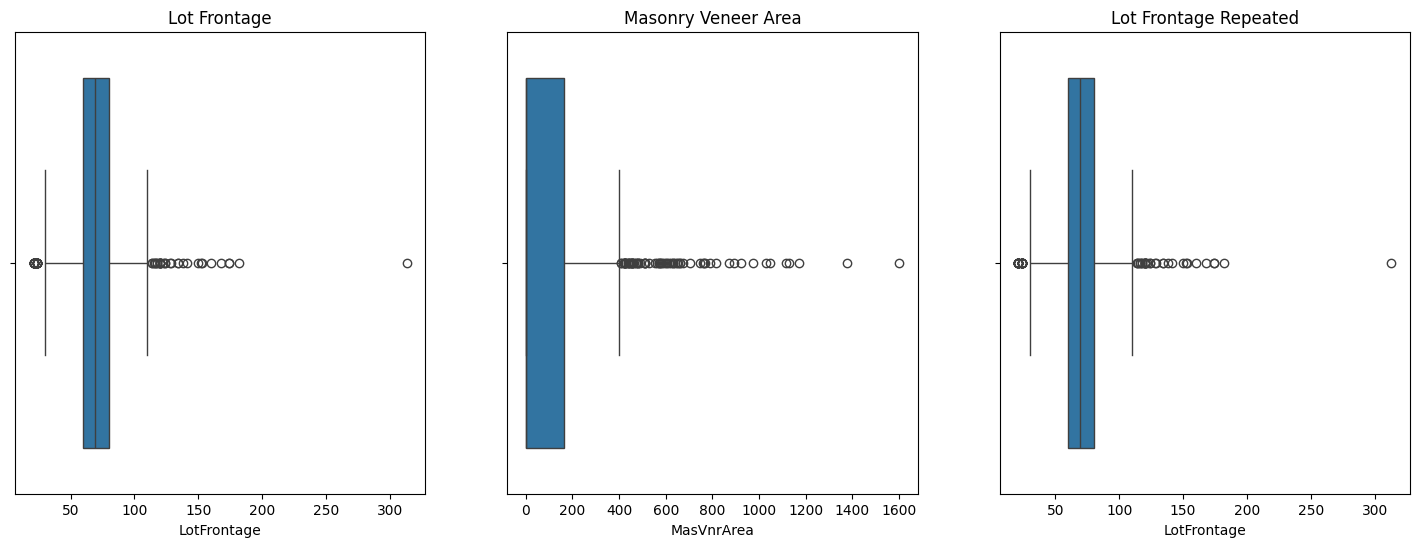

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  

sns.boxplot(x=df['LotFrontage'], ax=ax1)  
ax1.set_title('Lot Frontage')

sns.boxplot(x=df['MasVnrArea'], ax=ax2)  
ax2.set_title('Masonry Veneer Area') 

sns.boxplot(x=df['LotFrontage'], ax=ax3)  
ax3.set_title('Lot Frontage Repeated')  

plt.show()

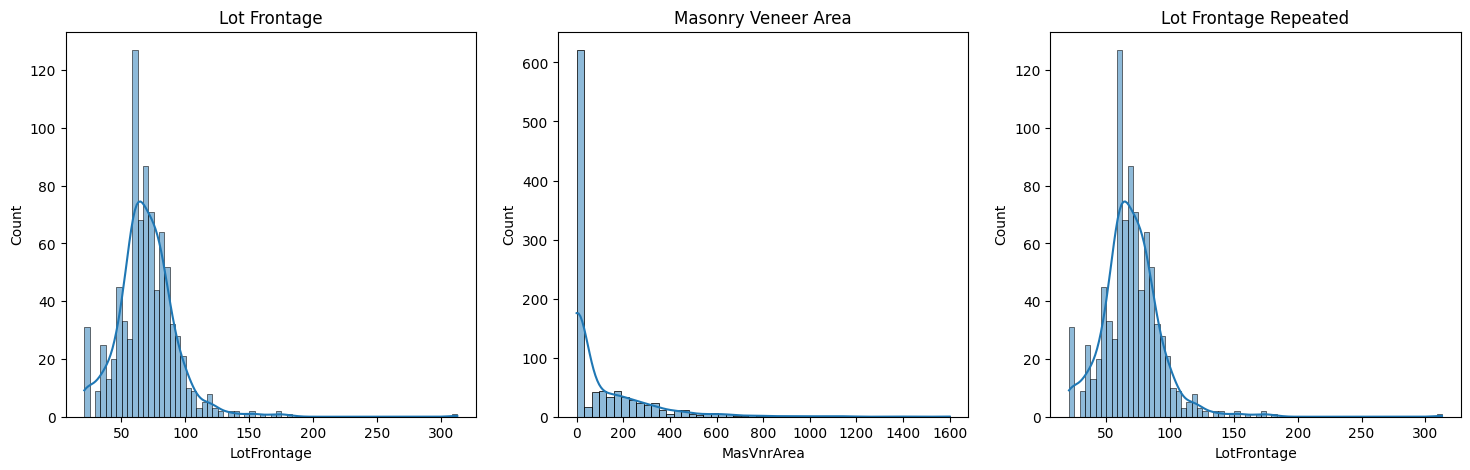

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))  

sns.histplot(x=df['LotFrontage'], ax=ax1, kde=True)  
ax1.set_title('Lot Frontage')

sns.histplot(x=df['MasVnrArea'], ax=ax2, kde=True)  
ax2.set_title('Masonry Veneer Area') 

sns.histplot(x=df['LotFrontage'], ax=ax3, kde=True)  
ax3.set_title('Lot Frontage Repeated')  

plt.show()

In [38]:
# Let's Impute values in numerical variables.
# LotFrontage, MasVnrArea, GarageYrBlt

df_num.loc[df_num['LotFrontage'].isnull(), 'LotFrontage'] = df_num['LotFrontage'].dropna().sample(df_num['LotFrontage'].isnull().sum(), random_state=12).values
df_num.loc[df_num['MasVnrArea'].isnull(), 'MasVnrArea'] = df_num['MasVnrArea'].dropna().sample(df_num['MasVnrArea'].isnull().sum(), random_state=12).values
df_num.loc[df_num['GarageYrBlt'].isnull(), 'GarageYrBlt'] = df_num['GarageYrBlt'].dropna().sample(df_num['GarageYrBlt'].isnull().sum(), random_state=12).values


X_test.loc[X_test['LotFrontage'].isnull(), 'LotFrontage'] = X_test['LotFrontage'].dropna().sample(X_test['LotFrontage'].isnull().sum(), random_state=12).values
X_test.loc[X_test['MasVnrArea'].isnull(), 'MasVnrArea'] = X_test['MasVnrArea'].dropna().sample(X_test['MasVnrArea'].isnull().sum(), random_state=12).values
X_test.loc[X_test['GarageYrBlt'].isnull(), 'GarageYrBlt'] = X_test['GarageYrBlt'].dropna().sample(X_test['GarageYrBlt'].isnull().sum(), random_state=12).values

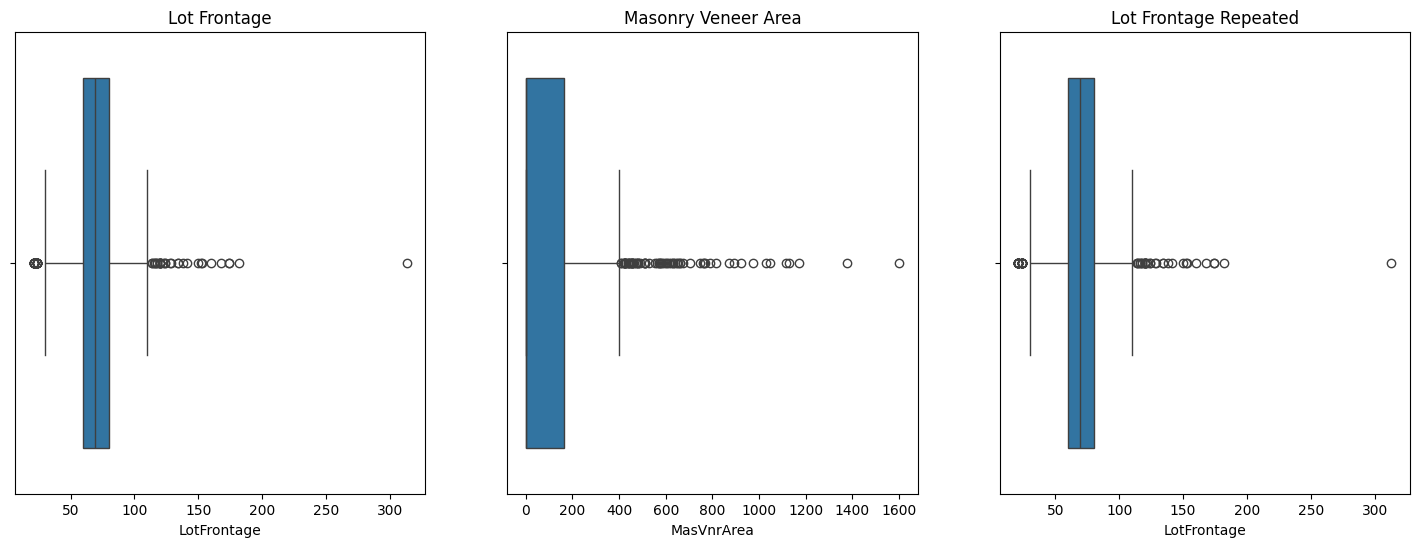

In [39]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))  

sns.boxplot(x=df['LotFrontage'], ax=ax1)  
ax1.set_title('Lot Frontage')

sns.boxplot(x=df['MasVnrArea'], ax=ax2)  
ax2.set_title('Masonry Veneer Area') 

sns.boxplot(x=df['LotFrontage'], ax=ax3)  
ax3.set_title('Lot Frontage Repeated')  

plt.show()

After Imputation the distribution haven't changed.

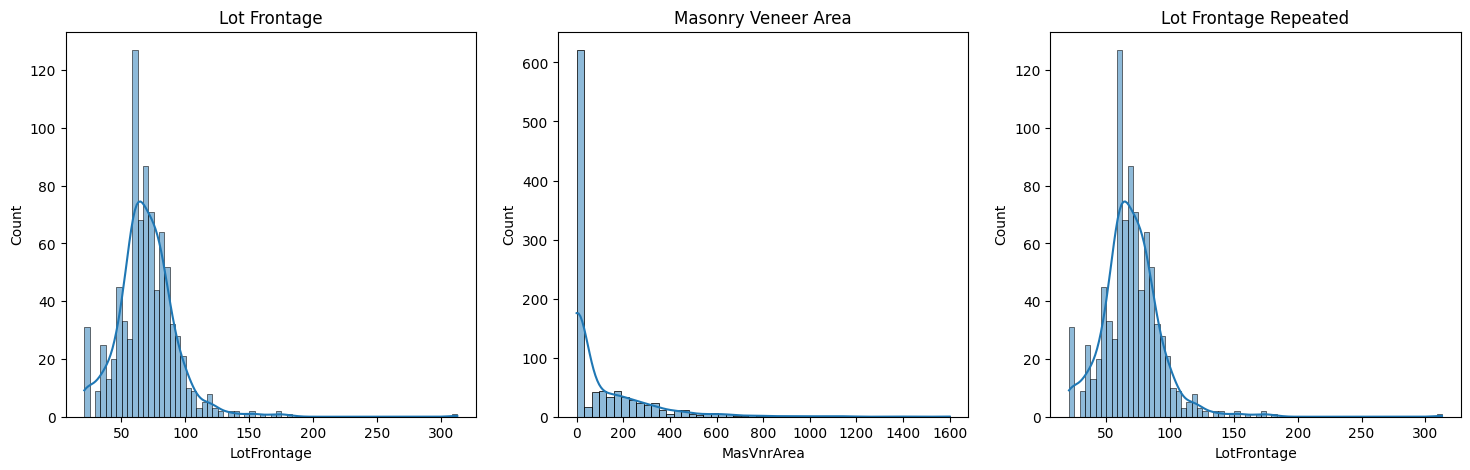

In [40]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))  

sns.histplot(x=df['LotFrontage'], ax=ax1, kde=True)  
ax1.set_title('Lot Frontage')

sns.histplot(x=df['MasVnrArea'], ax=ax2, kde=True)  
ax2.set_title('Masonry Veneer Area') 

sns.histplot(x=df['LotFrontage'], ax=ax3, kde=True)  
ax3.set_title('Lot Frontage Repeated')  

plt.show()

In [41]:
df_num.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
PriceRange       0
dtype: int64

Now let's impute Categorical variable. Before Imputing Categorical variable, we need to check couple of things whether it is nominal or Ordinal and based on that we should consider which kind of imputation should we perform. 

In [42]:
df_obj

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
800        RL   Pave   NaN      IR1         HLS    AllPub    Inside       Mod   
421        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
1353       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
676        RM   Pave  Grvl      Reg         Lvl    AllPub    Inside       Gtl   
1091       FV   Pave  Pave      Reg         Lvl    AllPub    Inside       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1092       RL   Pave   NaN      Reg         Bnk    AllPub    Inside       Gtl   
606        RL   Pave   NaN      IR2         Low    AllPub    Corner       Mod   
94         RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
396        RL   Pave   NaN      Reg         Low    AllPub    Inside       Gtl   
389        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
800       ClearCr      Feedr       Norm     1Fam     2Story     Gable   
421        NWAmes       Norm       Norm     1Fam     1Story     Gable   
1353      NoRidge       Norm       Norm     1Fam     1.5Fin       Hip   
676       OldTown       Norm       Norm     1Fam     2Story     Gable   
1091      Somerst       Norm       Norm    Twnhs     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
1092        SWISU       Norm       Norm     1Fam     1.5Fin     Gable   
606       CollgCr       Norm       Norm     1Fam     1Story     Gable   
94        CollgCr       Norm       Norm     1Fam     2Story     Gable   
396       CollgCr       Norm       Norm     1Fam     1Story       Hip   
389       NridgHt       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
800   CompShg     VinylSd     VinylSd        NaN        TA        TA   
421   CompShg     CemntBd     CmentBd      Stone        Gd        TA   
1353  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
676   CompShg     AsbShng      Stucco        NaN        TA        TA   
1091  CompShg     MetalSd     MetalSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
1092  CompShg     MetalSd     MetalSd        NaN        TA        TA   
606   CompShg     VinylSd     VinylSd        NaN        TA        Gd   
94    CompShg     VinylSd     VinylSd        NaN        TA        Gd   
396   CompShg     MetalSd     MetalSd        NaN        TA        TA   
389   CompShg     VinylSd     VinylSd      Stone        Ex        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
800       PConc       Gd       TA           Gd          GLQ          Unf   
421      CBlock       Gd       TA           No          ALQ          Unf   
1353      PConc       Gd       TA           Av          GLQ          Unf   
676      BrkTil       TA       Fa           No          Unf          Unf   
1091      PConc       Gd       TA           No          BLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
1092      PConc       TA       TA           No          Rec          Unf   
606       PConc       Gd       TA           No          GLQ          Unf   
94        PConc       Gd       TA           No          GLQ          Unf   
396      CBlock       TA       TA           Av          Rec          Unf   
389       PConc       Ex       TA           Av          GLQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
800     GasA        Gd          Y      SBrkr          Gd        Typ   
421     GasA        Gd          Y      SBrkr          Gd        Typ   
1353    GasA        Ex          Y      SBrkr          Gd        Typ   
676     GasW        Fa          N      SBrkr          TA       Min2   
1091    GasA        Ex

In [43]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1022 entries, 800 to 389
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1022 non-null   object
 1   Street         1022 non-null   object
 2   Alley          74 non-null     object
 3   LotShape       1022 non-null   object
 4   LandContour    1022 non-null   object
 5   Utilities      1022 non-null   object
 6   LotConfig      1022 non-null   object
 7   LandSlope      1022 non-null   object
 8   Neighborhood   1022 non-null   object
 9   Condition1     1022 non-null   object
 10  Condition2     1022 non-null   object
 11  BldgType       1022 non-null   object
 12  HouseStyle     1022 non-null   object
 13  RoofStyle      1022 non-null   object
 14  RoofMatl       1022 non-null   object
 15  Exterior1st    1022 non-null   object
 16  Exterior2nd    1022 non-null   object
 17  MasVnrType     406 non-null    object
 18  ExterQual      1022 non-null   o

Before we proceed to imputation we have some categorical variables with more than 50% null values. For which if we impute, it will lead to false predictions. so its better to drop those variables. 

In [44]:
# Dropping columns that has more than 50% missing values
drop_col = ['MiscFeature', 'Fence', 'PoolQC', 'MasVnrType', 'Alley']

df_obj = df_obj.drop(drop_col, axis=1)
X_test = X_test.drop(drop_col, axis=1)

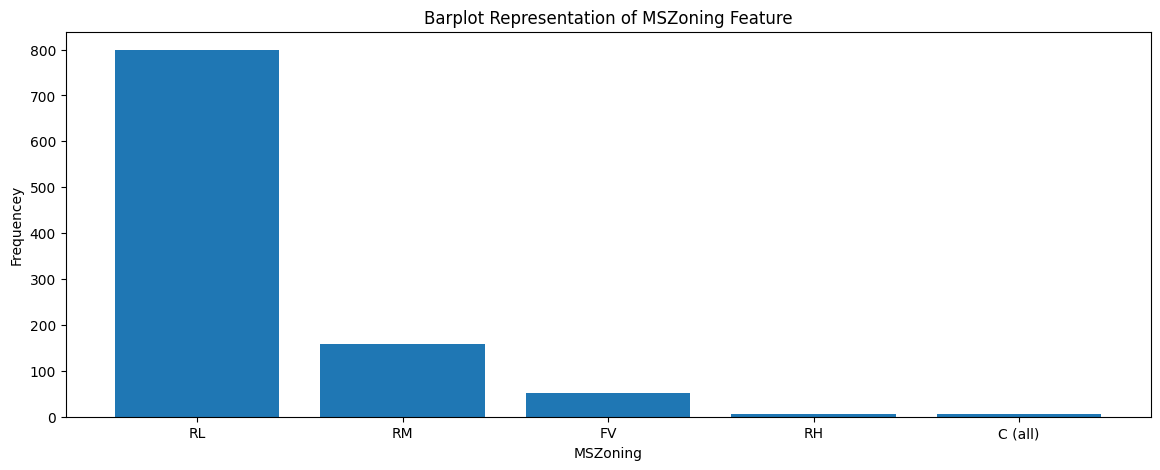

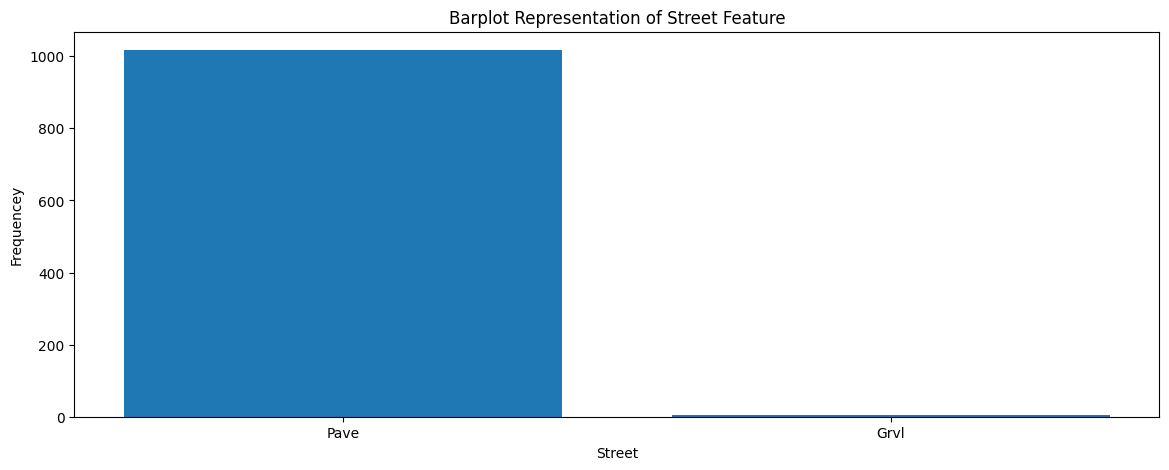

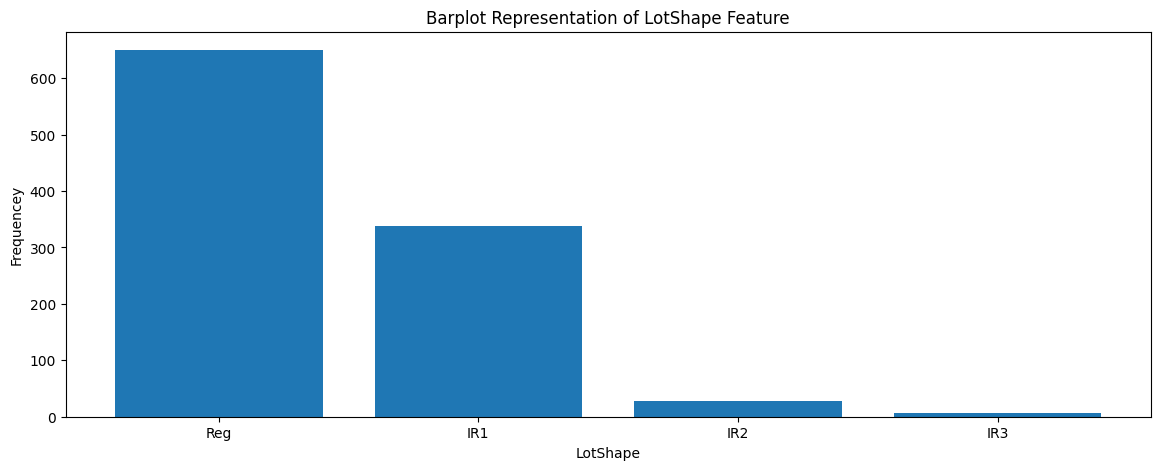

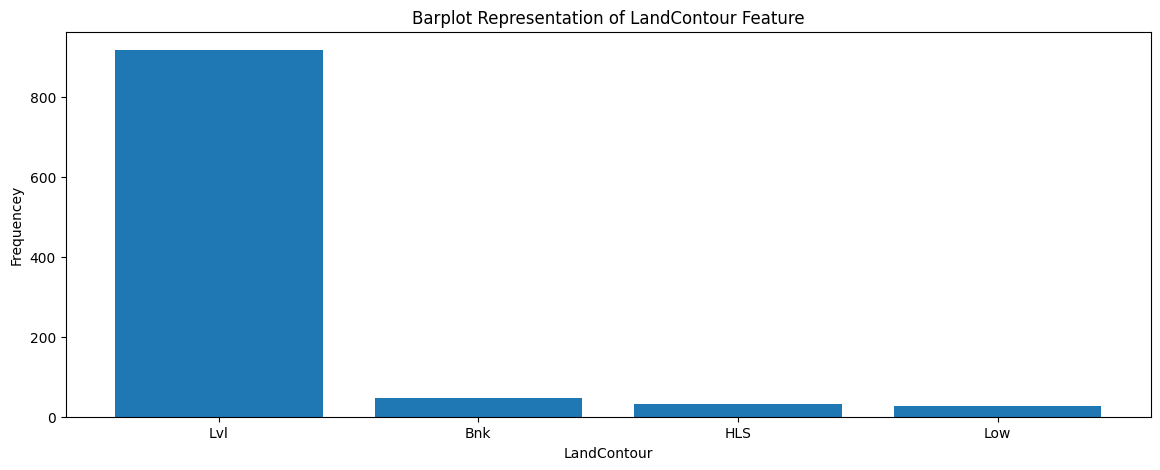

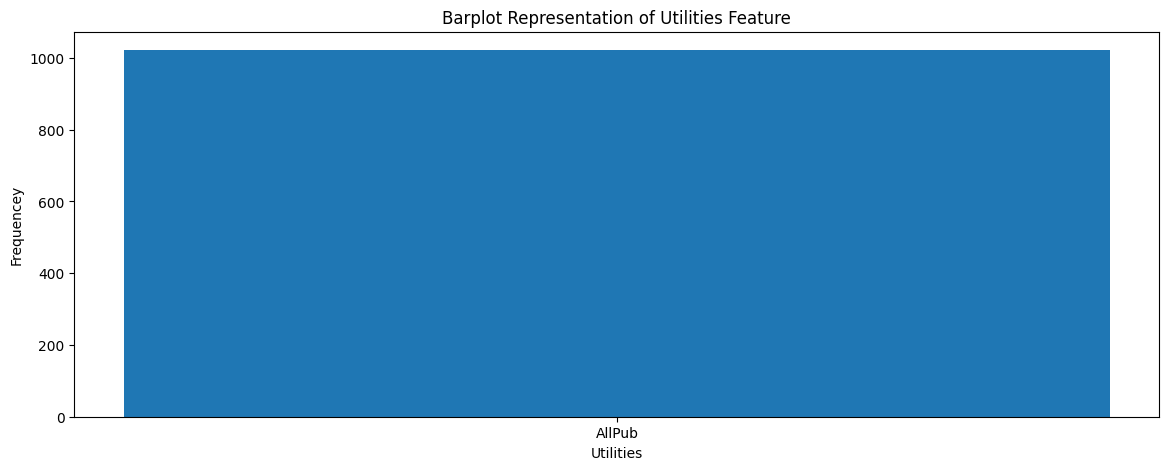

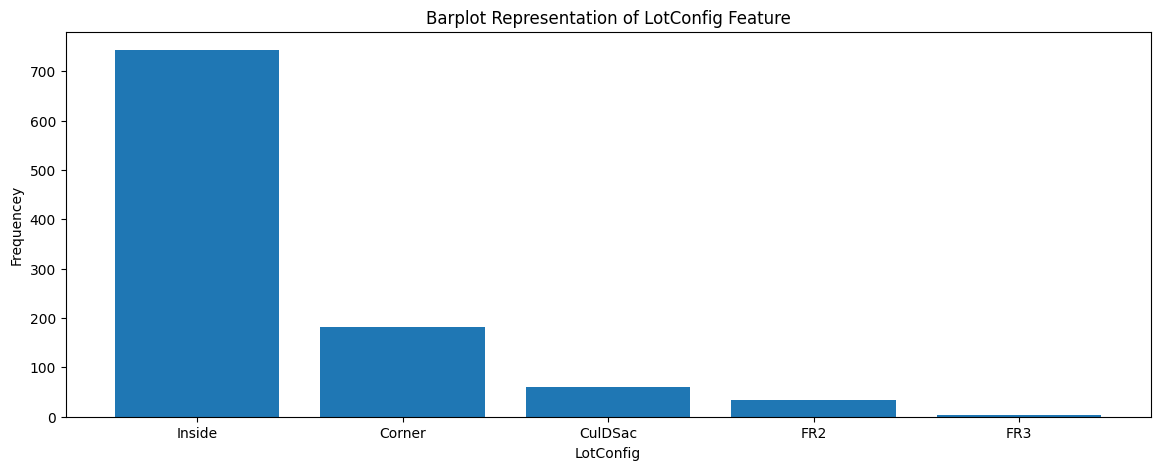

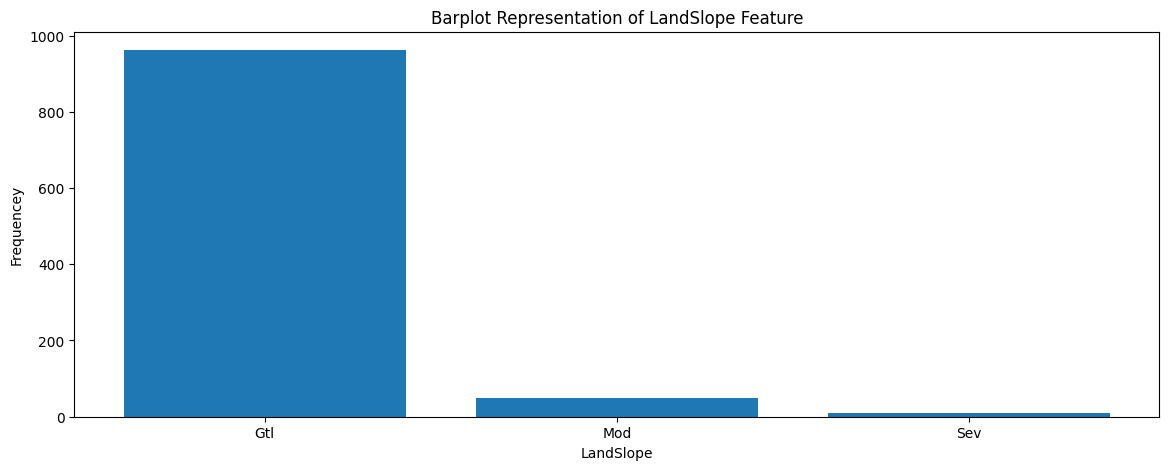

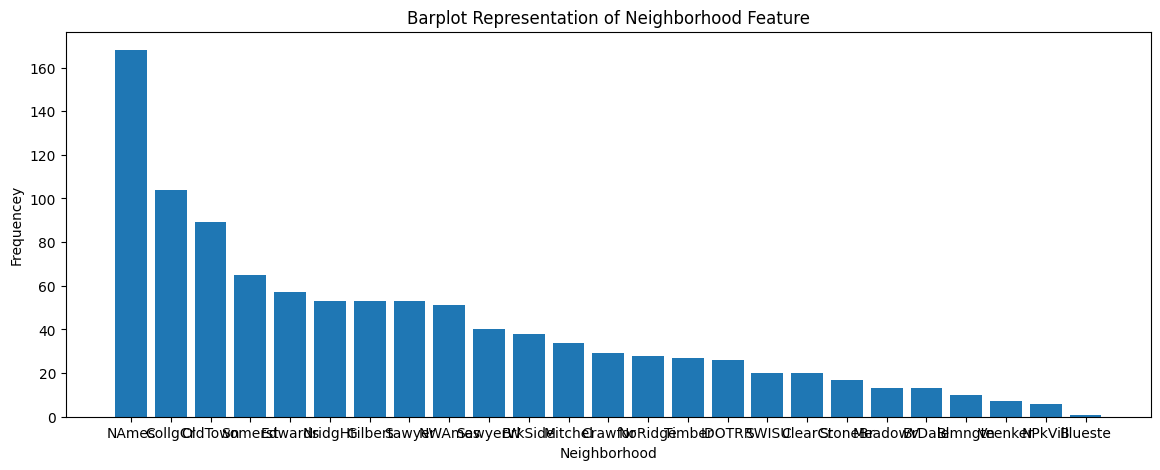

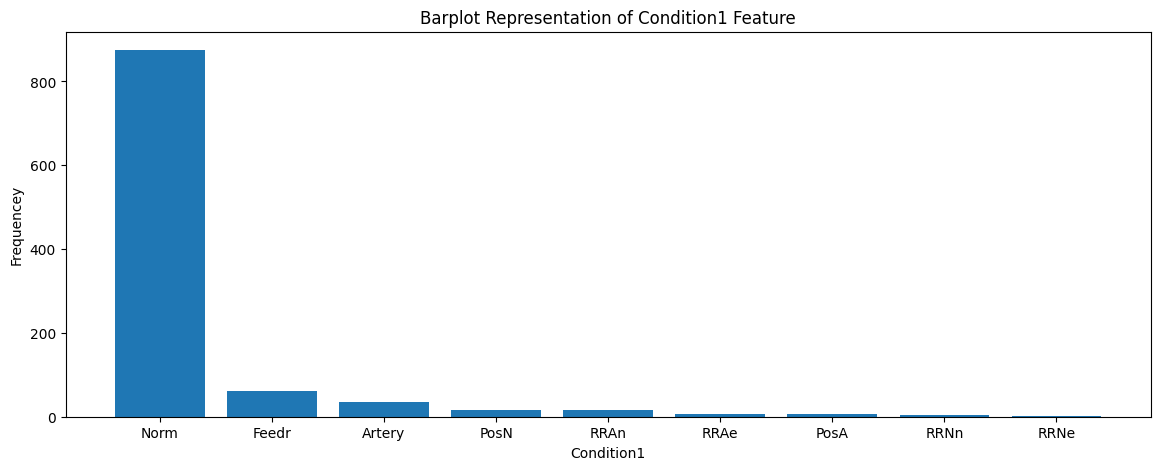

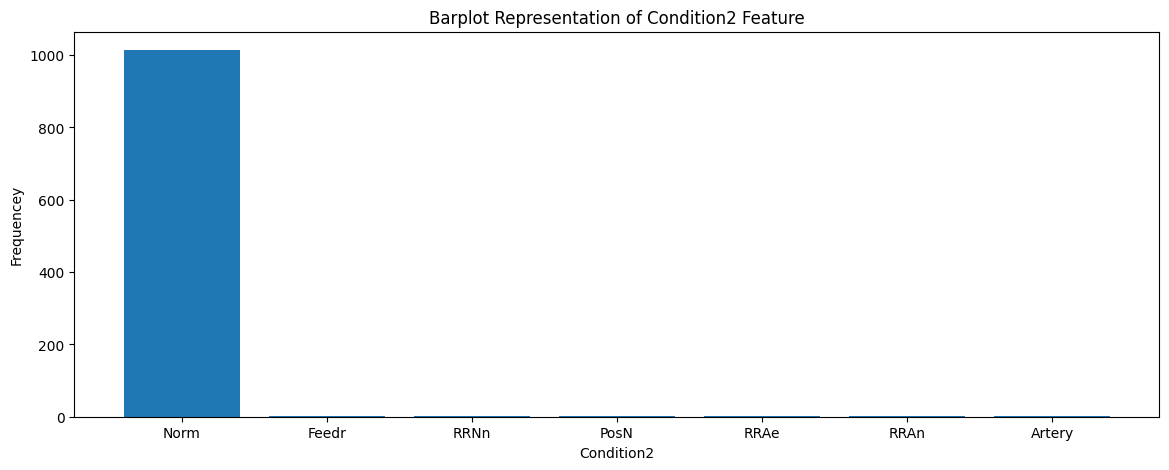

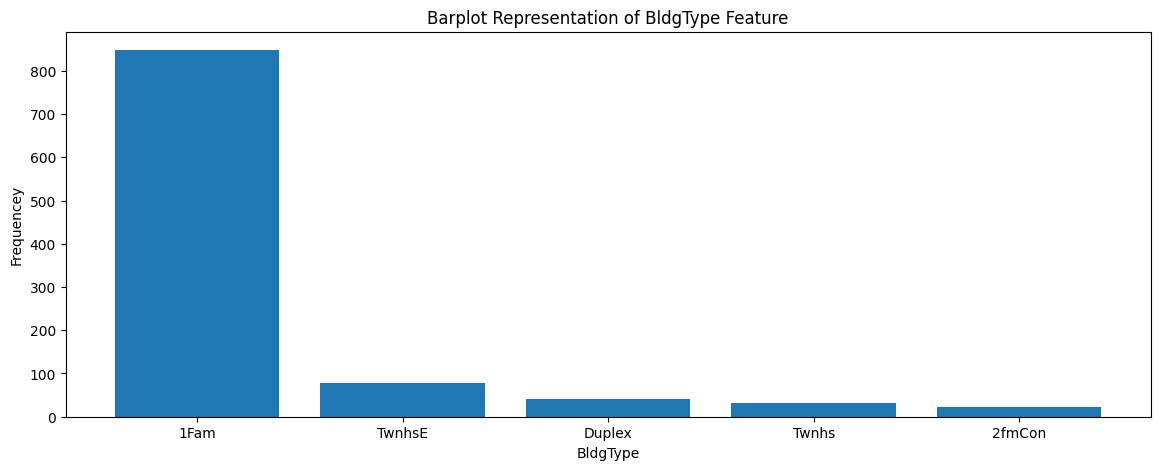

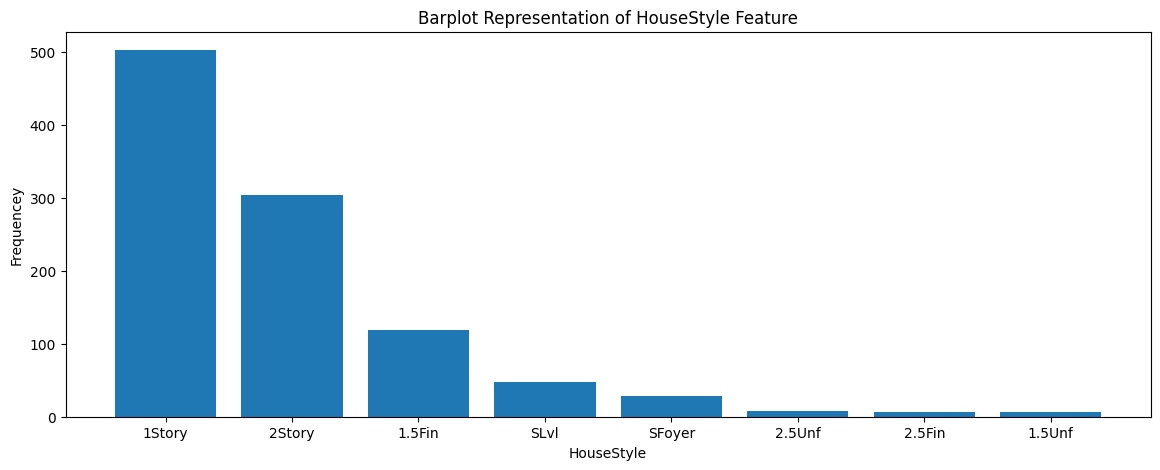

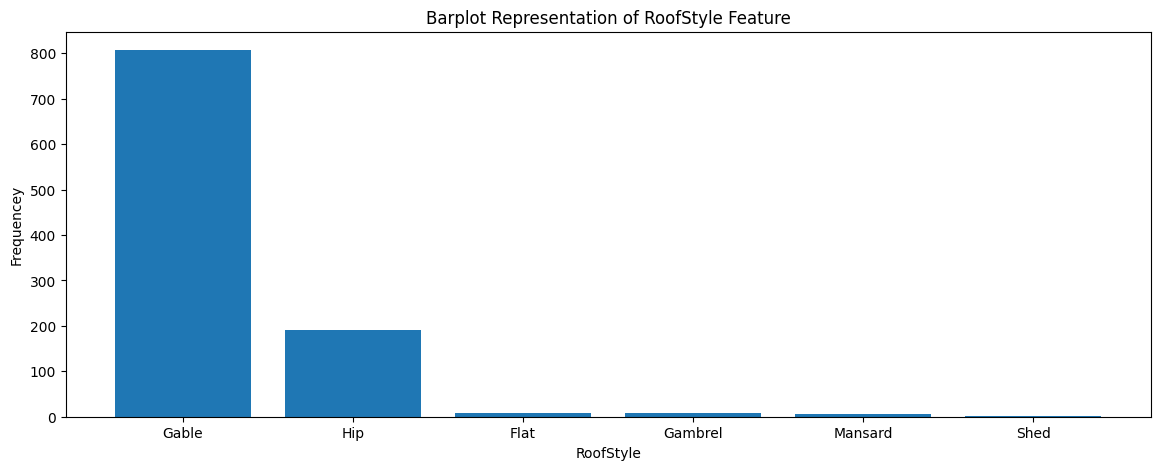

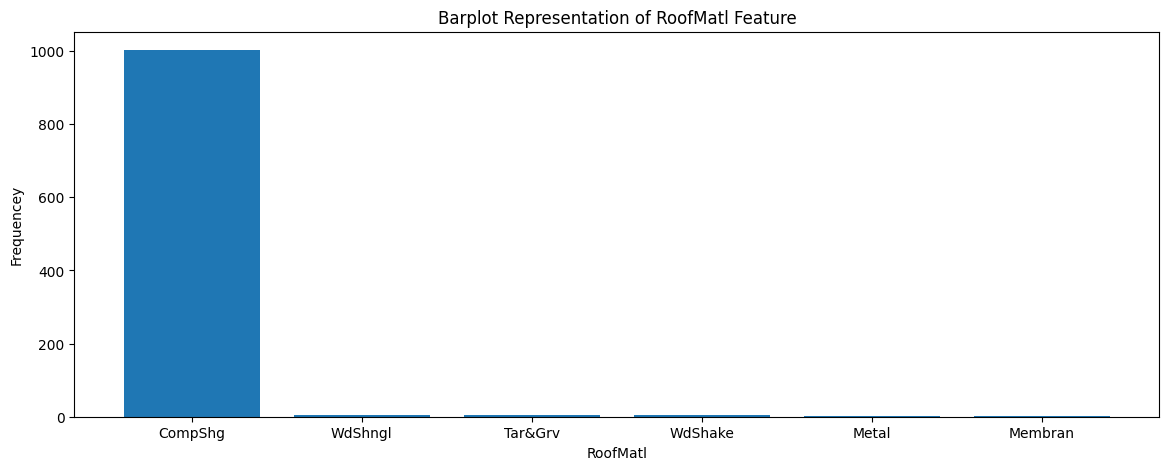

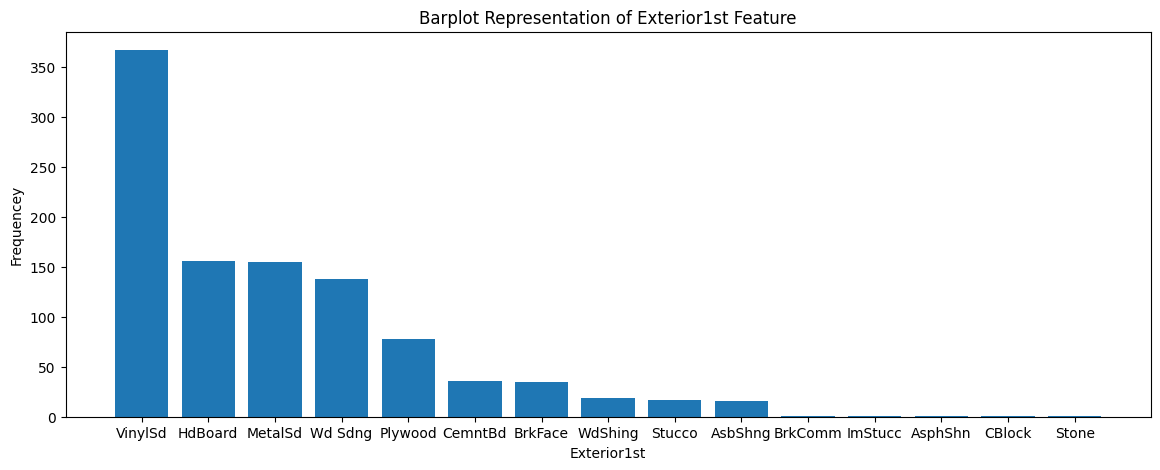

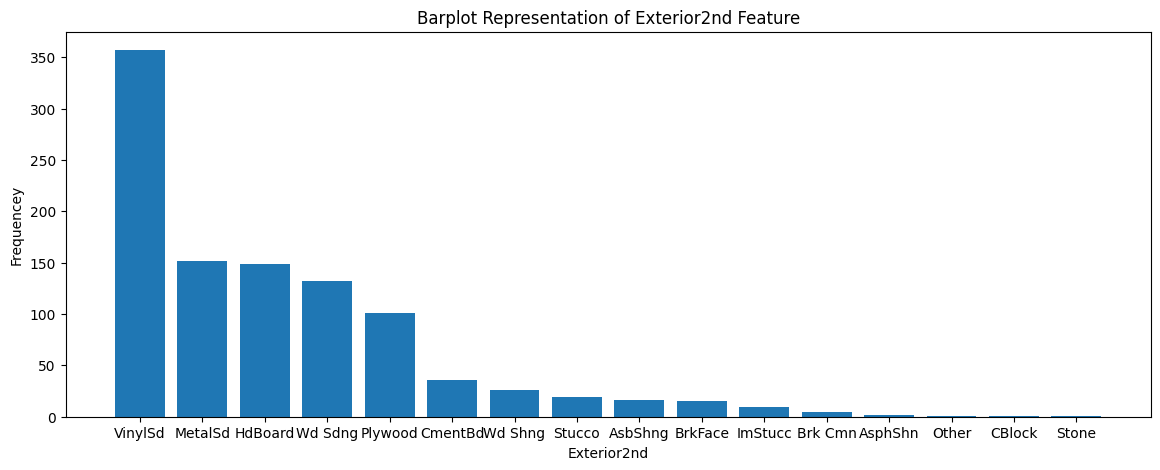

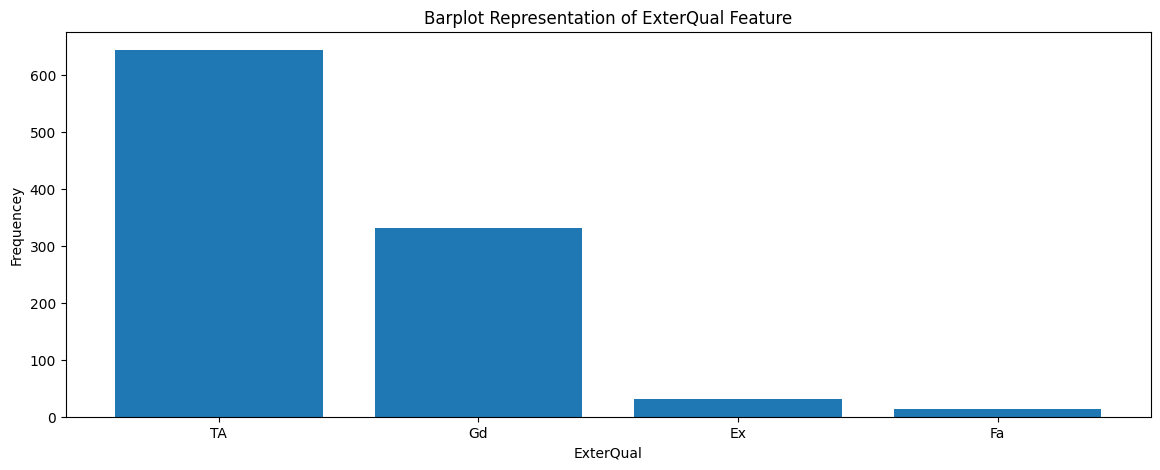

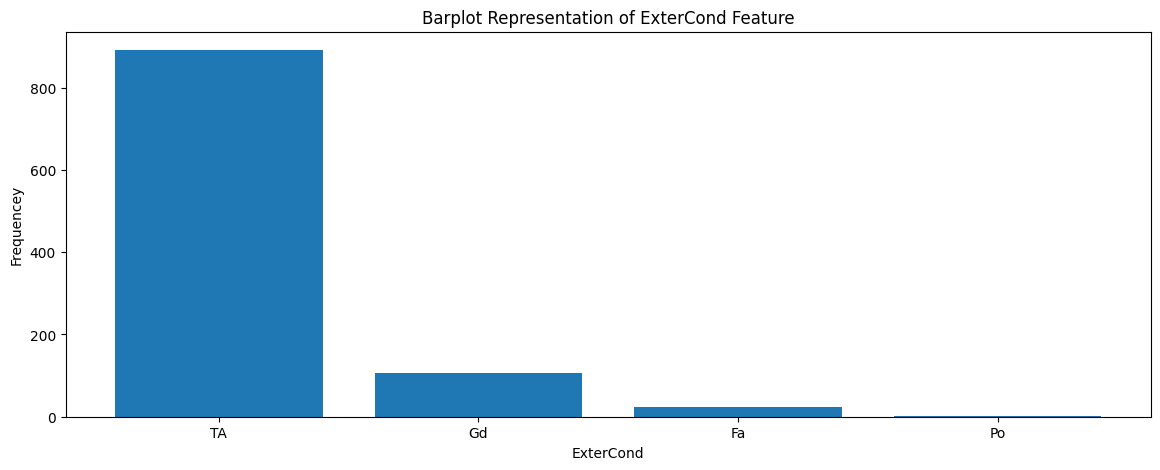

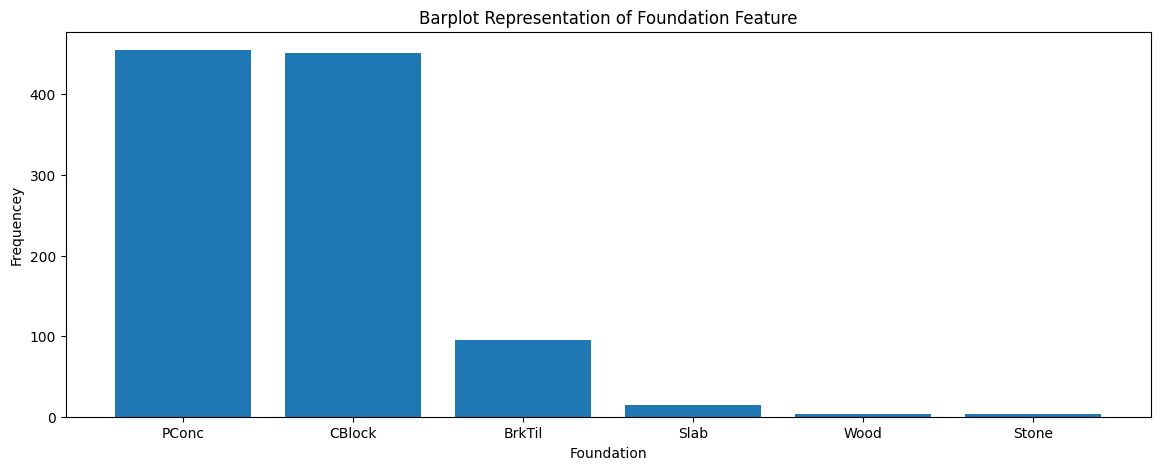

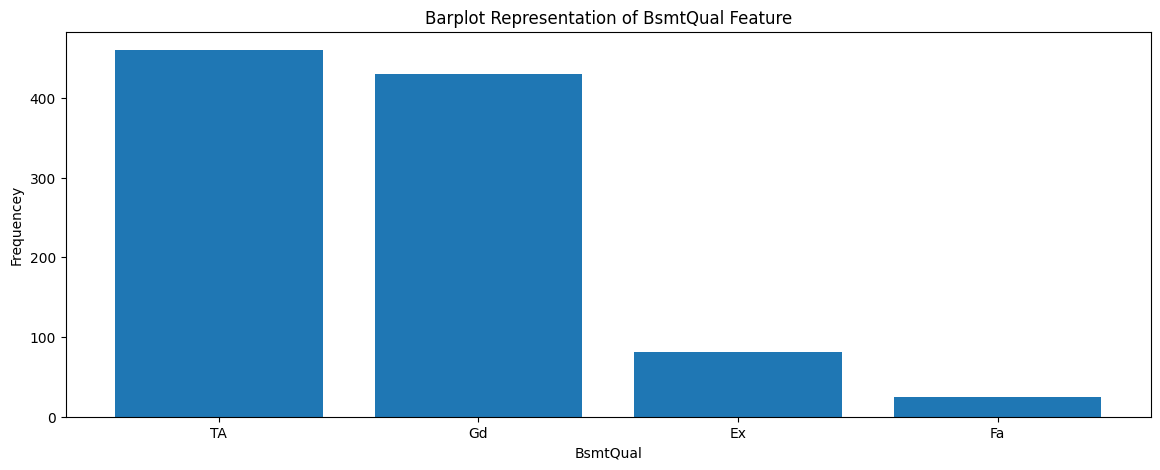

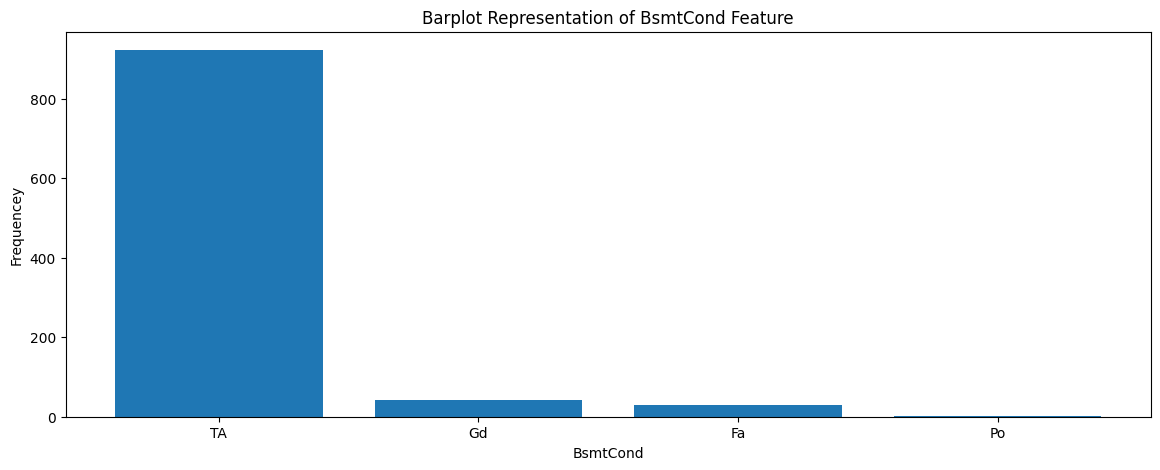

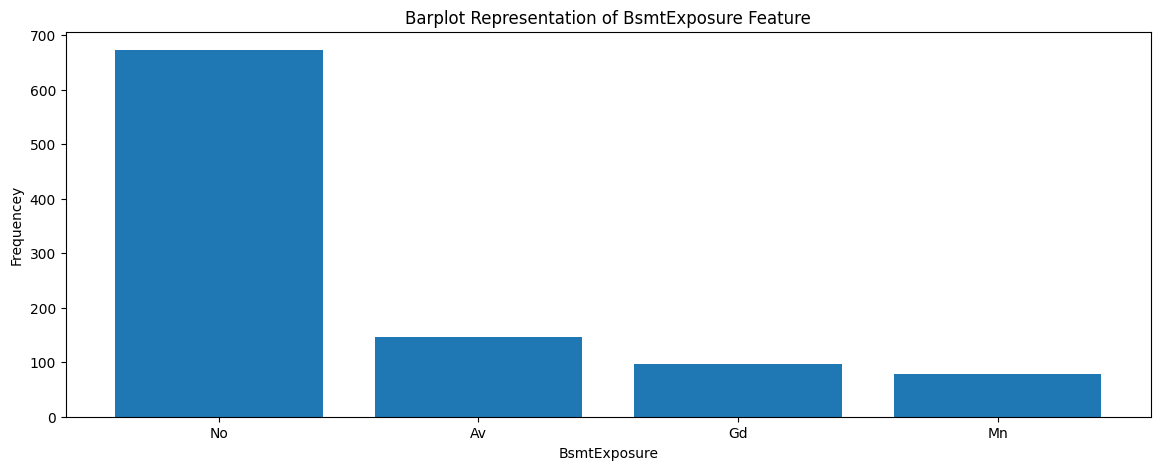

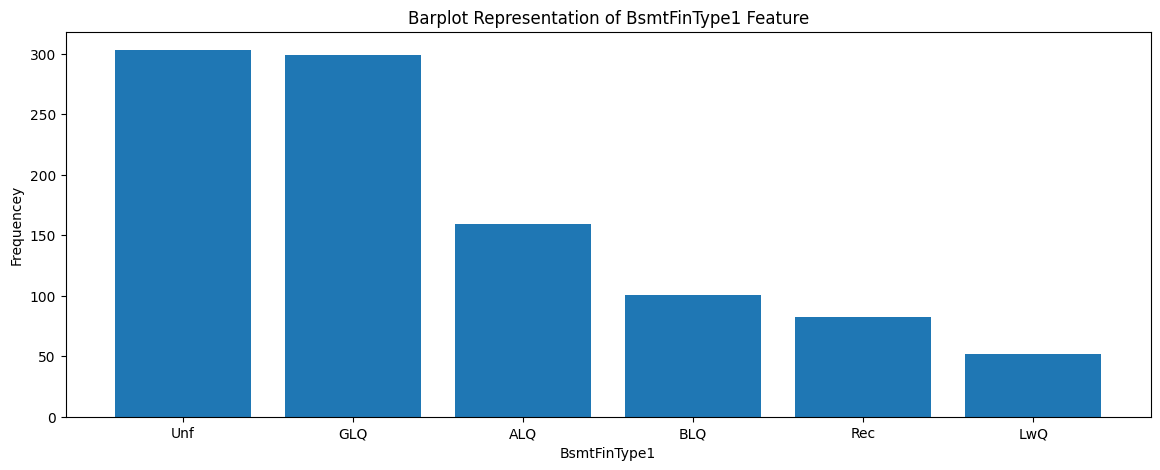

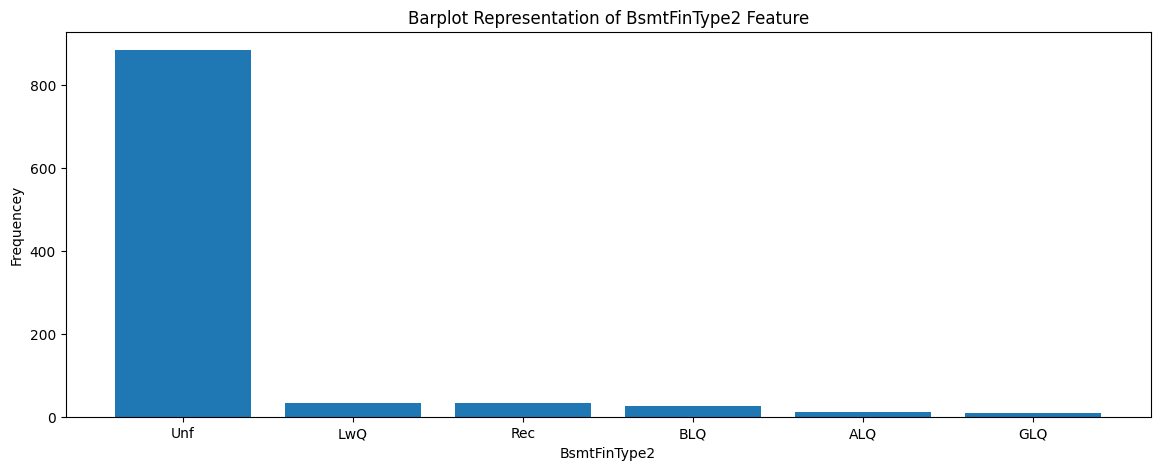

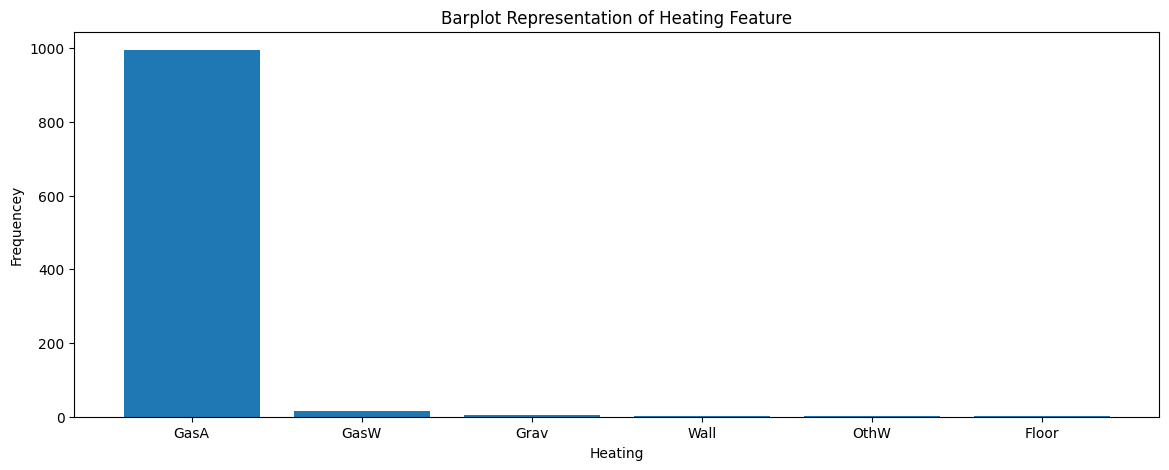

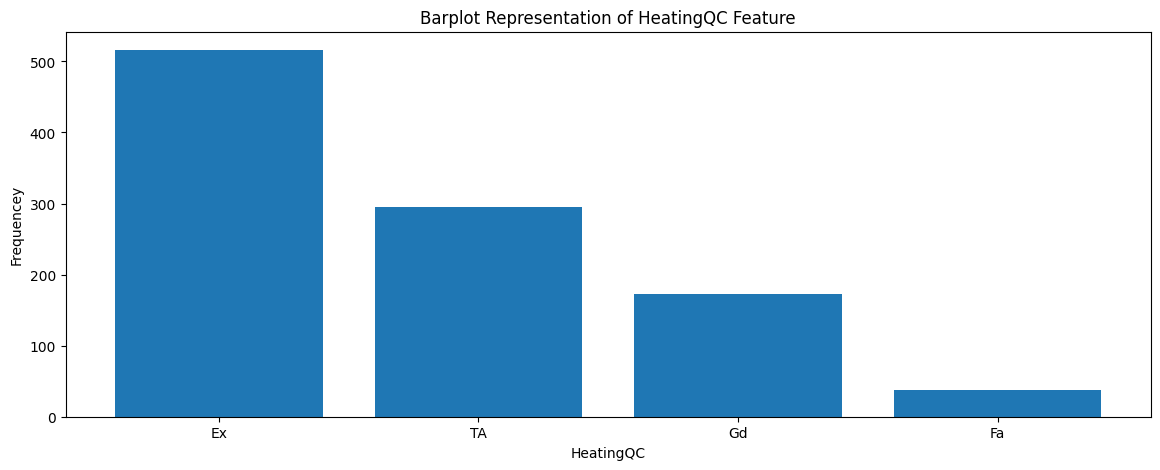

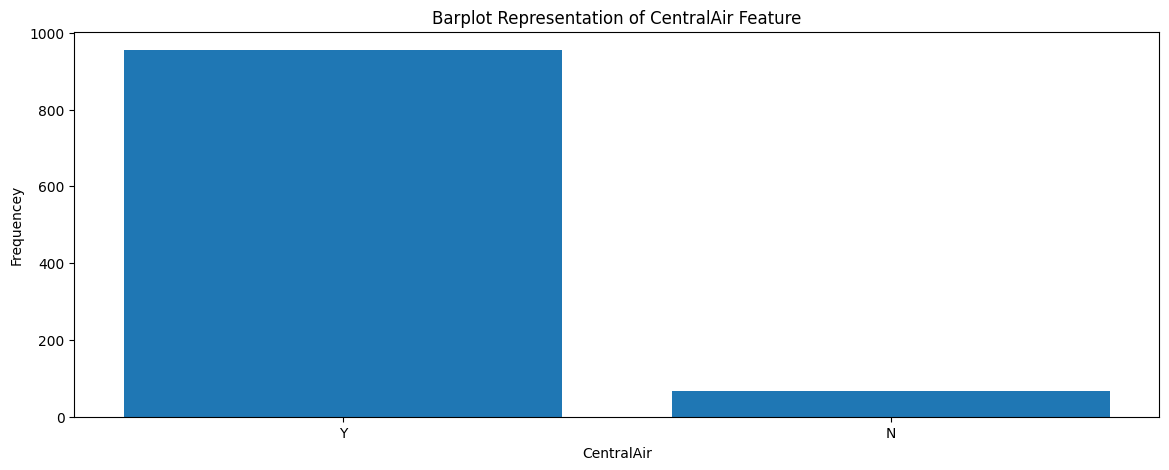

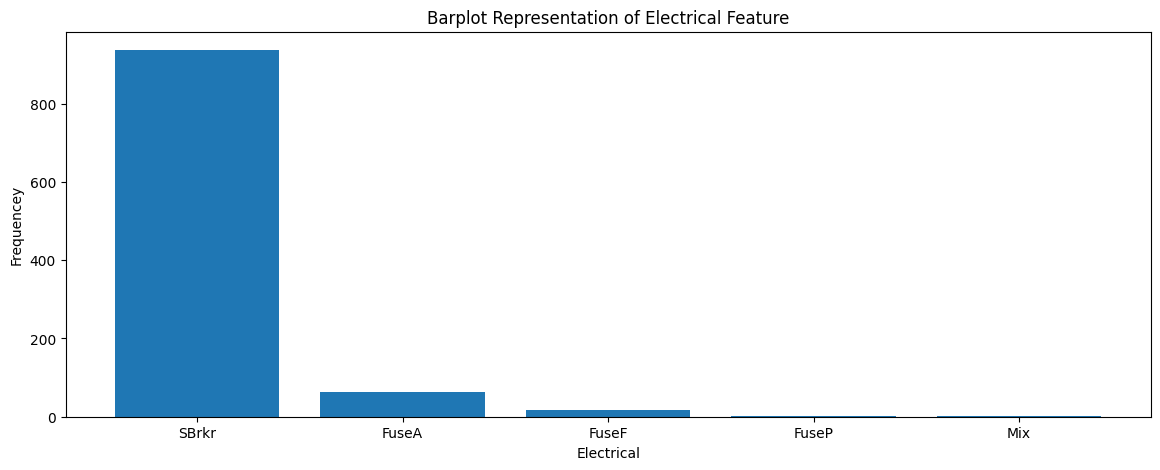

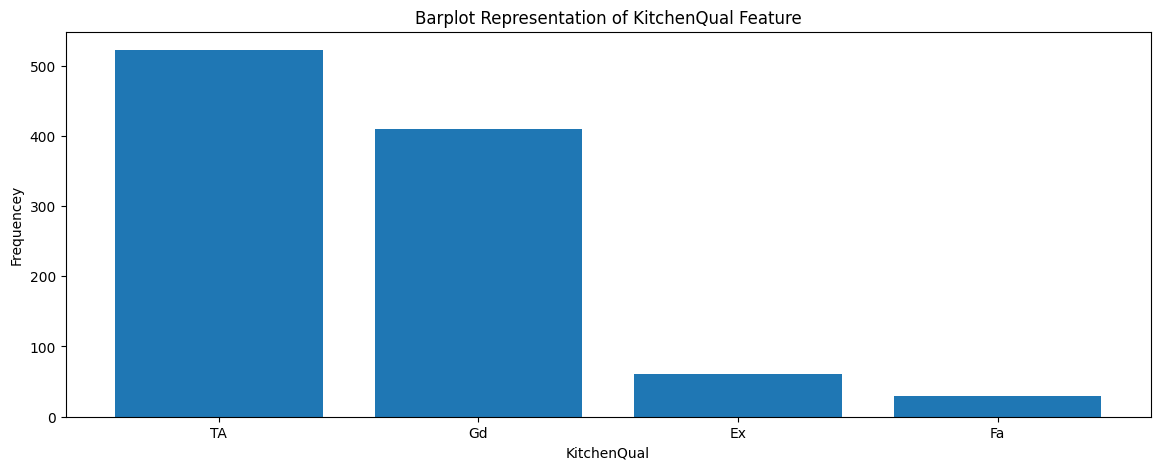

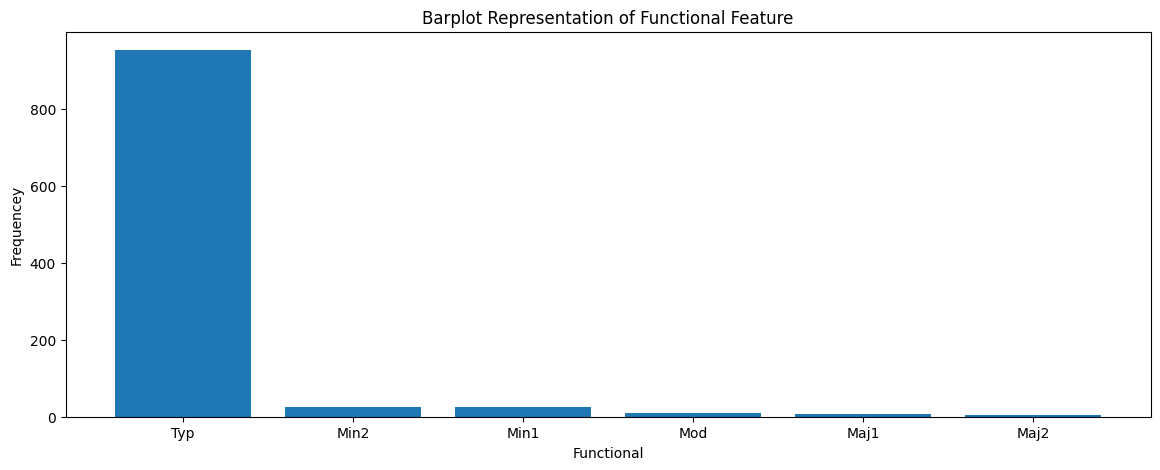

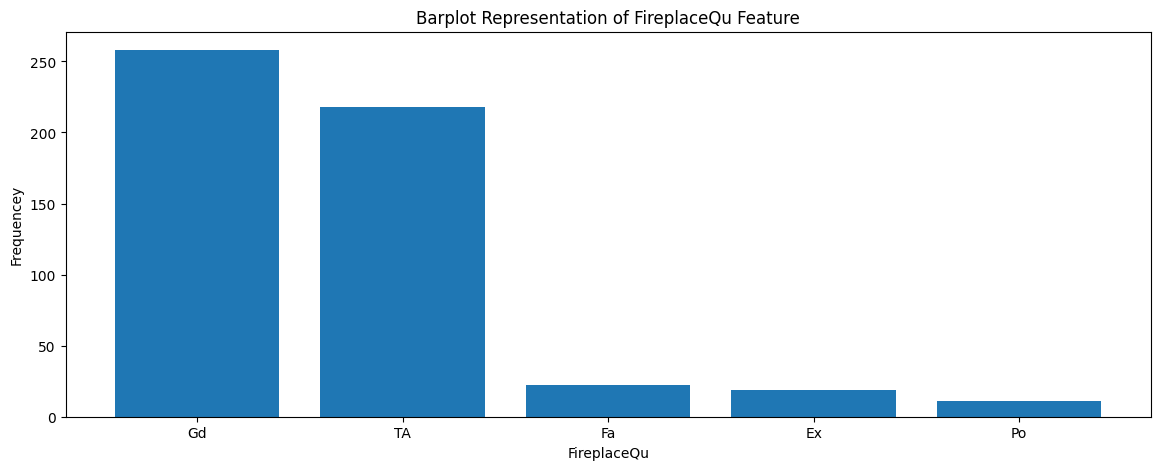

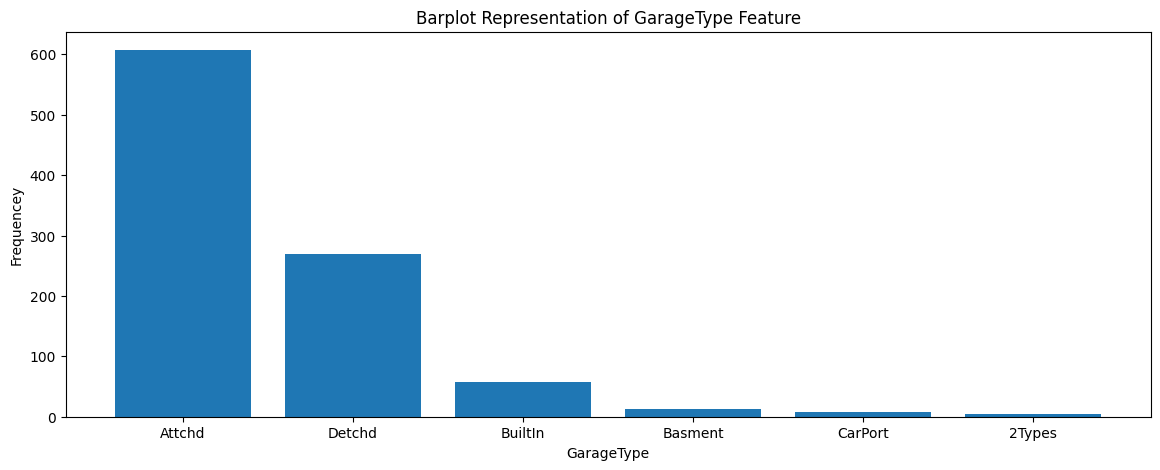

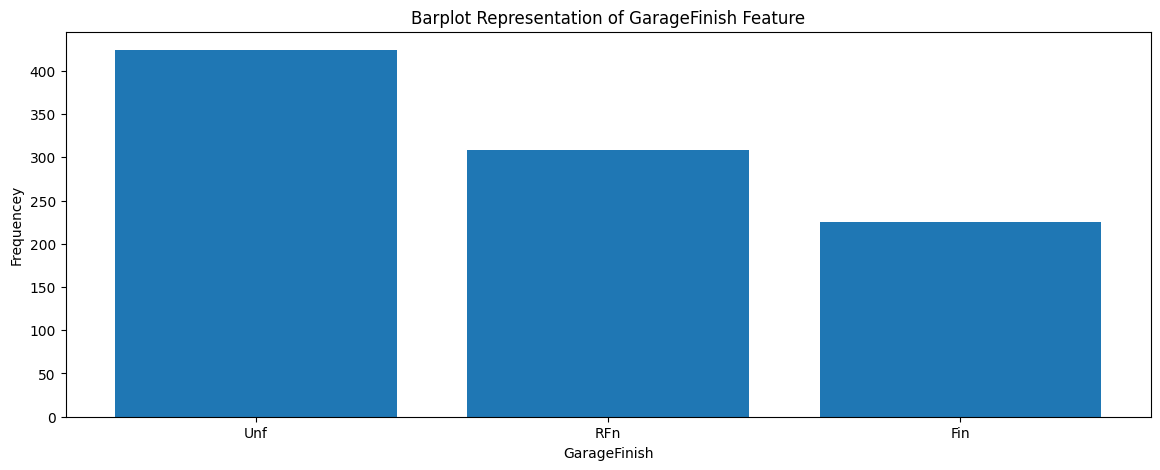

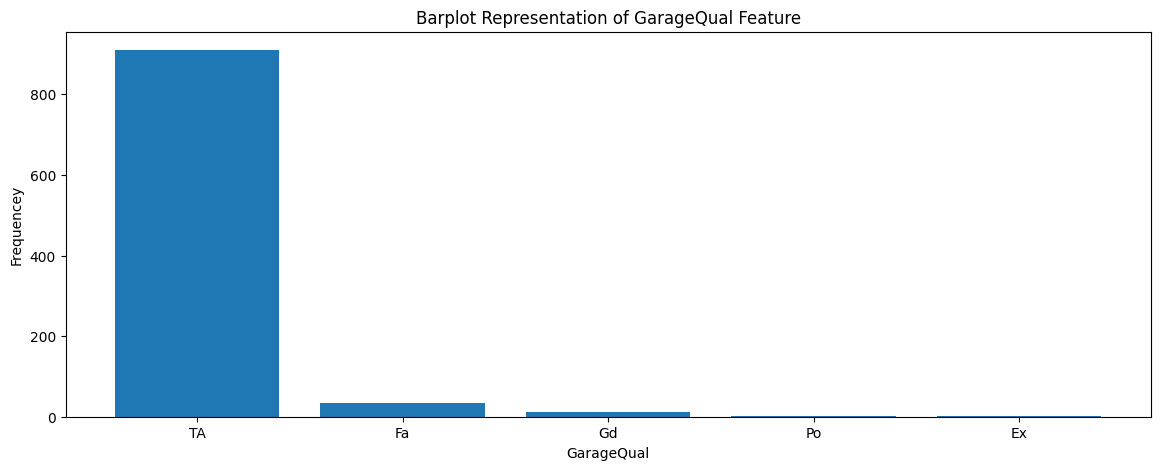

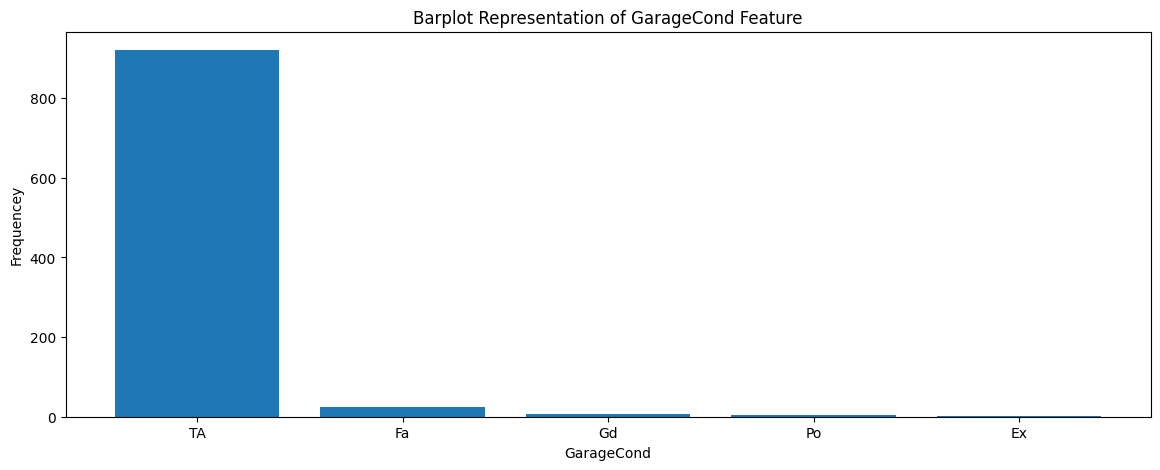

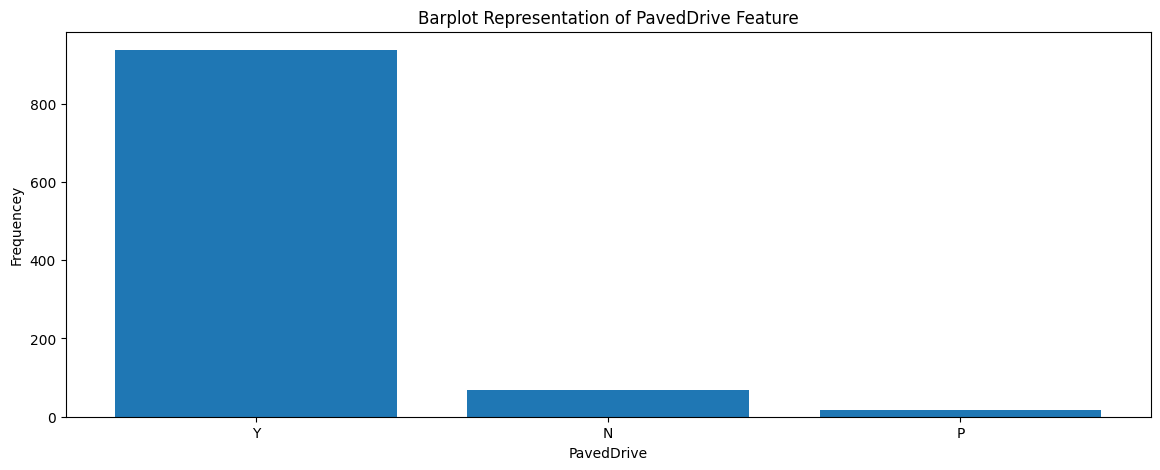

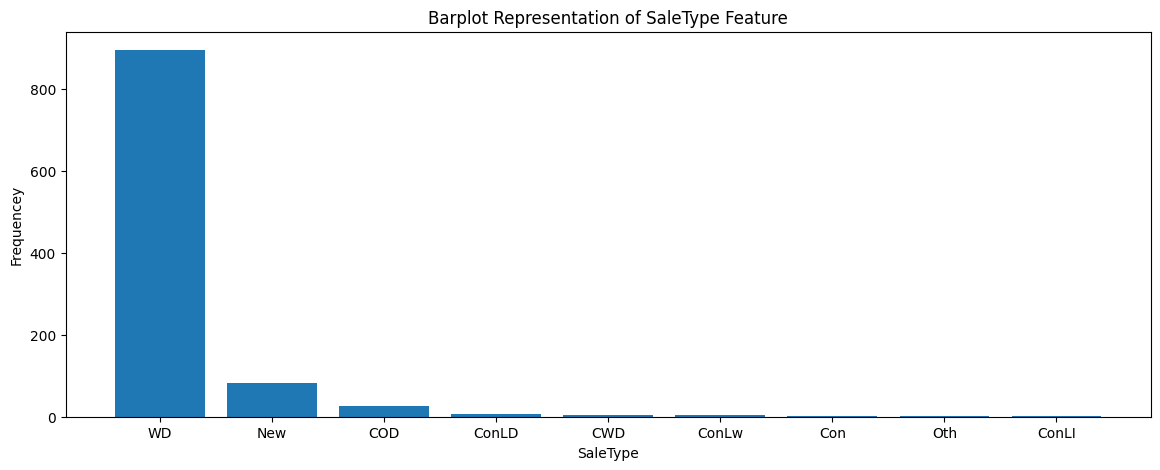

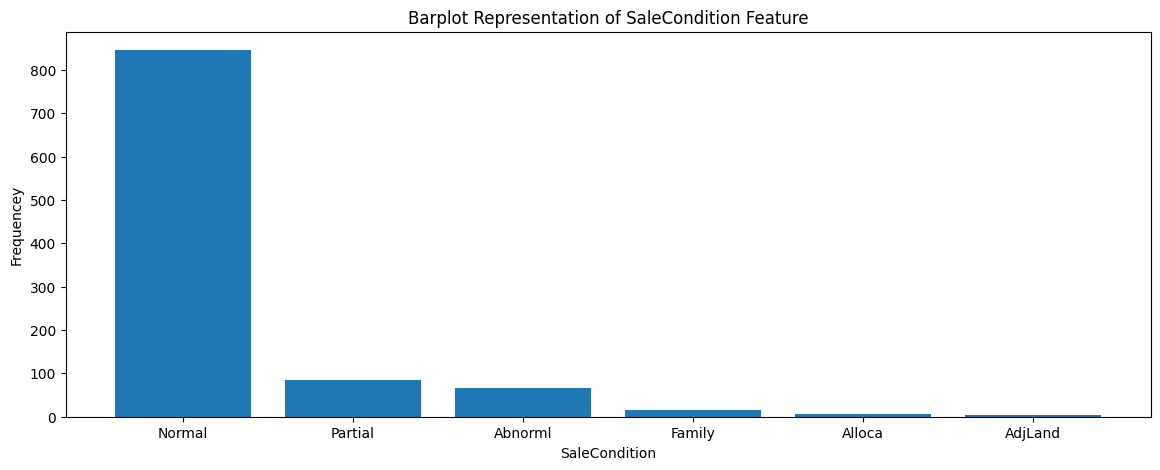

In [45]:
# Bar Plot of Categorical Variables

def plot_object_graph(df):
    for col in df.columns:
        category_counts = df[col].value_counts()

        # Plot the histogram-like representation of the categorical feature
        plt.figure(figsize=(14, 5))
        plt.bar(category_counts.index, category_counts.values)
        plt.xlabel(col)
        plt.ylabel('Frequencey')
        plt.title(f'Barplot Representation of {col} Feature')
        plt.show()


plot_object_graph(df_obj)

In [46]:
# Let's find out how many ordinal and nominal categorical features are present in the dataset
def classify_categorical(dataframe):
    count = 0
    for col in dataframe.columns:
        if dataframe[col].nunique() >= 2 and col not in drop_col:
            print(f'{col} with nunique values {dataframe[col].nunique()}')
            print(f'{col} has unique value {dataframe[col].unique()}')
            print(f'value counts {dataframe[col].value_counts().sort_values(ascending=False)}')
            print('------' * 10)
            count += 1
    print(f'{count} categorical variable with specific unique values')

classify_categorical(df_obj)

MSZoning with nunique values 5
MSZoning has unique value ['RL' 'RM' 'FV' 'RH' 'C (all)']
value counts MSZoning
RL         799
RM         158
FV          51
RH           7
C (all)      7
Name: count, dtype: int64
------------------------------------------------------------
Street with nunique values 2
Street has unique value ['Pave' 'Grvl']
value counts Street
Pave    1017
Grvl       5
Name: count, dtype: int64
------------------------------------------------------------
LotShape with nunique values 4
LotShape has unique value ['IR1' 'Reg' 'IR2' 'IR3']
value counts LotShape
Reg    650
IR1    338
IR2     27
IR3      7
Name: count, dtype: int64
------------------------------------------------------------
LandContour with nunique values 4
LandContour has unique value ['HLS' 'Lvl' 'Low' 'Bnk']
value counts LandContour
Lvl    917
Bnk     47
HLS     31
Low     27
Name: count, dtype: int64
------------------------------------------------------------
LotConfig with nunique values 5
LotConfig ha

First lets impute Ordinal type categorical variable 

In [47]:
ordinal_col = ['LotShape','LandSlope','ExterQual','ExterCond','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
               'HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','SaleCondition']


nominal_col = ['MSZoning', 'Street', 'LandContour', 'Utilities', 'LotConfig','Neighborhood','Condition1','Condition2',
                   'BldgType', 'HouseStyle','RoofStyle','RoofMatl' ,'Exterior1st','Exterior2nd','Foundation','Heating',
                   'CentralAir','Electrical','GarageType','PavedDrive','SaleType']

In [48]:
len(ordinal_col), len(nominal_col)

(17, 21)

In [49]:
df_obj[ordinal_col] = df_obj[ordinal_col].apply(lambda col: col.fillna(col.mode()[0]), axis=0)
df_obj[nominal_col] = df_obj[nominal_col].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

X_test[ordinal_col] = X_test[ordinal_col].apply(lambda col: col.fillna(col.mode()[0]), axis=0)
X_test[nominal_col] = X_test[nominal_col].apply(lambda col: col.fillna(col.mode()[0]), axis=0)

In [50]:
df_obj.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [51]:
X_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
PriceRange       0
Length: 75, dtype: int64

In [52]:
def add_new_features(df):
    df = df.copy()
    df['TotalArea'] = df['LotArea'] + df['GrLivArea'] + df['TotalBsmtSF']
    df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    df['TimeSinceRenovation'] = df['YrSold'] - df['YearRemodAdd']
    df['TotalBathrooms'] = (
        df['FullBath'] + (0.5 * df['HalfBath']) +
        df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
    )
    df['TotalPorchArea'] = (
        df['OpenPorchSF'] + df['EnclosedPorch'] +
        df['3SsnPorch'] + df['ScreenPorch']
    )
    df['QualityIndex'] = df['OverallQual'] * df['OverallCond']
    df['GrLivArea_to_TotalBsmtSF'] = df['GrLivArea'] / (df['TotalBsmtSF'] + 1)
    df['GarageSpacePerCar'] = df['GarageArea'] / (df['GarageCars'] + 1)
    df['IsLuxuryHome'] = (df['OverallQual'] >= 8).astype(int)
    df['Qual_Age_Interaction'] = df['OverallQual'] * df['HouseAge']
    df.fillna(0, inplace=True)
    return df

In [53]:
df_num = add_new_features(df_num)
X_test = add_new_features(X_test)

In [54]:
df_num.shape, X_test.shape

((1022, 47), (438, 85))

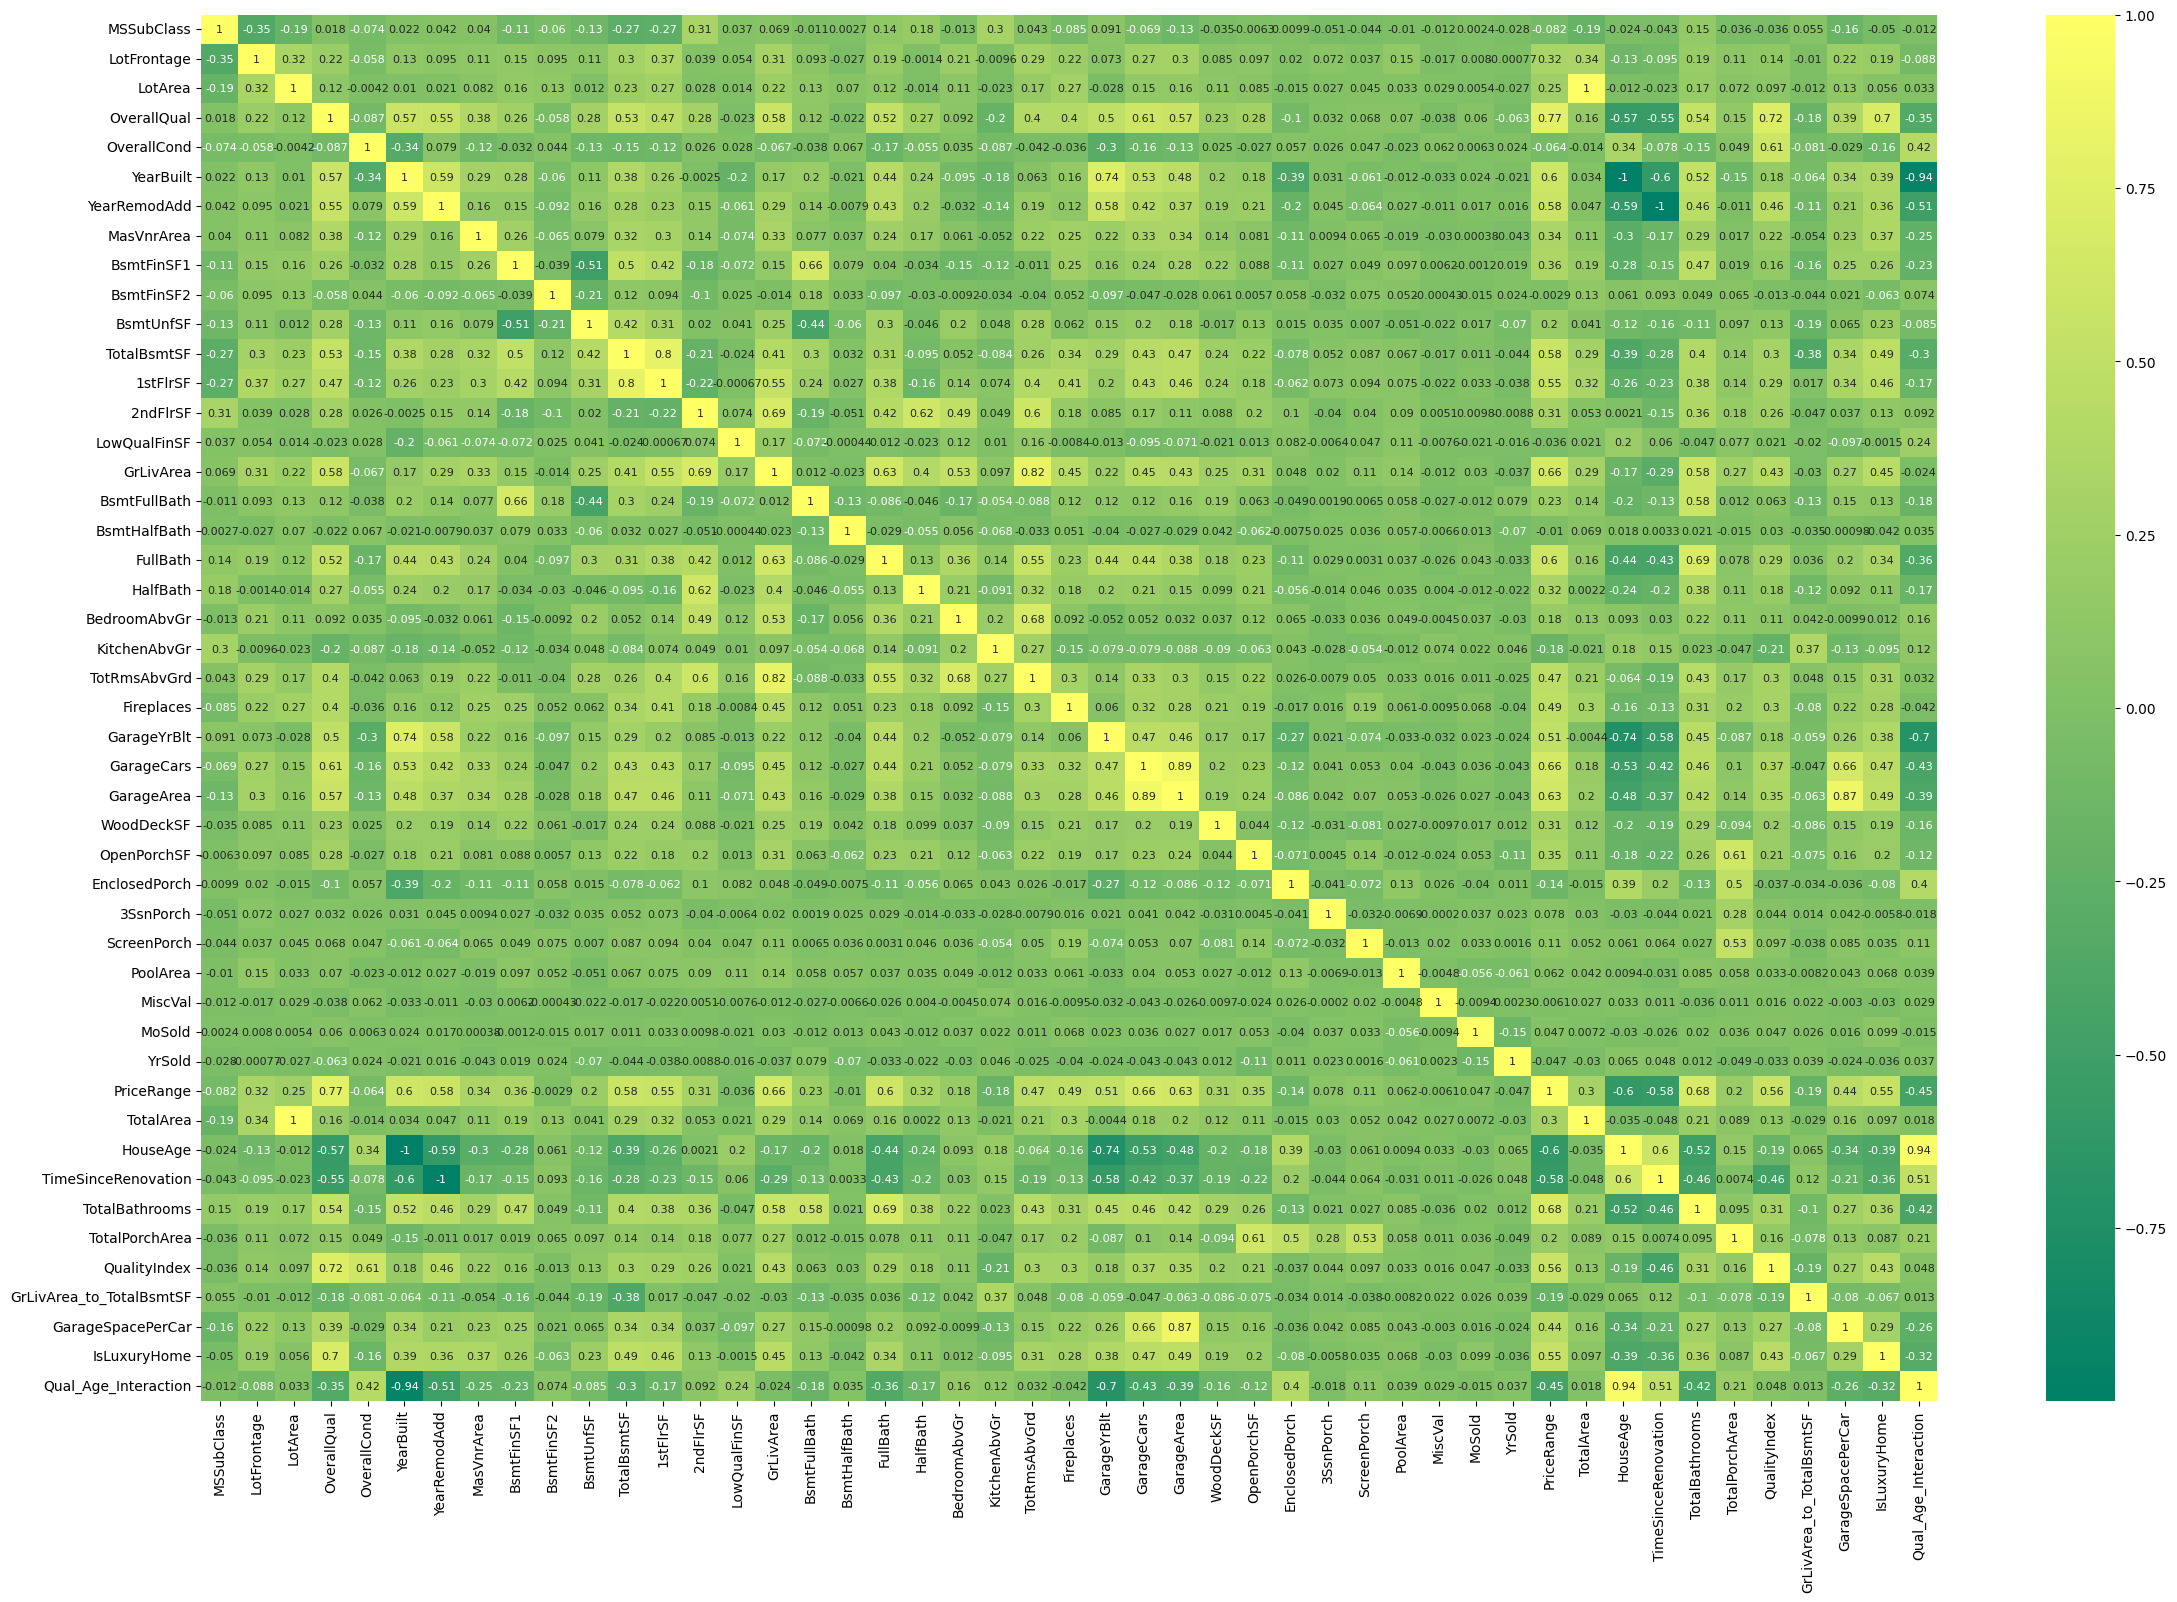

In [55]:
corr_new_feat = df_num.corr(numeric_only=True)
plt.figure(figsize=(28,18))
sns.heatmap(corr_new_feat, annot=True, cmap="summer", annot_kws={"size": 8});

In [56]:
threshold_multicollinear = 0.80
correlation_matrix = df_num.corr()

high_correlation = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold_multicollinear:
            high_correlation.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

high_corr_df = pd.DataFrame(high_correlation, columns=['Feature1', 'Feature2', 'Correlation'])

print("Features with High Multicollinearity:")
print(high_corr_df)

Features with High Multicollinearity:
               Feature1      Feature2  Correlation
0          TotRmsAbvGrd     GrLivArea     0.819816
1            GarageArea    GarageCars     0.891363
2             TotalArea       LotArea     0.997310
3              HouseAge     YearBuilt    -0.999051
4   TimeSinceRenovation  YearRemodAdd    -0.997911
5     GarageSpacePerCar    GarageArea     0.873534
6  Qual_Age_Interaction     YearBuilt    -0.941409
7  Qual_Age_Interaction      HouseAge     0.941253


In [57]:
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

df_obj_ordinal = df_obj[ordinal_col]
df_obj_ordinal_encoded = ordinal_encoder.fit_transform(df_obj_ordinal)
df_obj_ordinal_df = pd.DataFrame(df_obj_ordinal_encoded, columns=ordinal_col, index=df_obj[ordinal_col].index)
df_obj = df_obj.drop(columns=ordinal_col)
df_obj = pd.concat([df_obj, df_obj_ordinal_df], axis=1)

X_test_ordinal_encoded = ordinal_encoder.transform(X_test[ordinal_col])
X_test_ordinal_df = pd.DataFrame(X_test_ordinal_encoded, columns=ordinal_col, index=X_test.index)
X_test = X_test.drop(columns=ordinal_col)
X_test = pd.concat([X_test, X_test_ordinal_df], axis=1)

In [58]:
label_encoding = LabelEncoder()

for col in nominal_col:
    # df_obj[col] = df_obj[col].astype(str)
    # X_test[col] = X_test[col].astype(str)
    df_obj[col]= label_encoding.fit_transform(df_obj[col])
    X_test[col] = X_test[col].apply(lambda x: label_encoding.transform([x])[0] if x in label_encoding.classes_ else -1)

In [59]:
X_train = pd.concat([df_obj, df_num], axis=1)

X_train.shape, X_test.shape

((1022, 85), (438, 85))

In [60]:
X_train.head(10)

MSZoning  Street  LandContour  Utilities  LotConfig  Neighborhood  \
800          3       1            1          0          4             4   
421          3       1            3          0          2            14   
1353         3       1            3          0          1            15   
676          4       1            3          0          4            17   
1091         1       1            3          0          4            21   
777          3       1            3          0          4            19   
210          3       1            3          0          4             7   
1129         4       1            3          0          4            17   
22           3       1            3          0          4             5   
637          4       1            3          0          4            17   

      Condition1  Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  \
800            1           2         0           5          1         0   
421            2           2         0           2          1         0   
1353           2           2         0           0          3         0   
676            2           2         0           5          1         0   
1091           2           2         3           5          1         0   
777            2           2         0           2          3         0   
210            2           2         0           2          1         0   
1129           2           2         2           6          1         0   
22             2           2         0           2          3         0   
637            2           2         1           0          1         0   

      Exterior1st  Exterior2nd  Foundation  Heating  CentralAir  Electrical  \
800            12           13           2        1           1           4   
421             5            5           1        1           1           4   
1353           12           13           2        1           1           4   
676             0           12           0        2           0           4   
1091            8            8           2        1           1           4   
777             6           10           1        1           1           4   
210            11           12           1        1           0           0   
1129            8            8           1        1           1           4   
22             12           13           2        1           1           4   
637            13           14           1        1           1           0   

      GarageType  PavedDrive  SaleType  LotShape  LandSlope  ExterQual  \
800            1           2         8       0.0        1.0        3.0   
421            1           2         8       0.0        0.0        2.0   
1353           1           2         8       0.0        0.0        2.0   
676            0           0         8       3.0        0.0        3.0   
1091           5           2         8       3.0        0.0        2.0   
777            1           2         8       0.0        0.0        3.0   
210            1           2         8       3.0        0.0        3.0   
1129           5           2         8       3.0        0.0        3.0   
22             1           2         8       3.0        0.0        2.0   
637            3           2         8       3.0        0.0        3.0   

      ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
800         3.0       2.0       3.0           1.0           2.0           5.0   
421         3.0       2.0       3.0           3.0           0.0           5.0   
1353        3.0       2.0       3.0           0.0           2.0           5.0   
676         3.0       3.0       0.0           3.0           5.0           5.0   
1091        3.0       2.0       3.0           3.0           1.0           5.0   
777         3.0       3.0       3.0           3.0           0.0           5.0   
210         3.0       3.0       3.0           3.0           4.0           5.0   
1129        3.0      

In [61]:
X_test

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LandContour  \
776           20         3         86.0    11210       1            3   
549           60         1         75.0     9375       1            3   
678           20         3         80.0    11844       1            3   
922           20         3         65.0    10237       1            3   
804           20         3         75.0     9000       1            3   
...          ...       ...          ...      ...     ...          ...   
82            20         3         78.0    10206       1            3   
911           20         3         65.0     9286       1            3   
1395          60         3         88.0    12665       1            3   
764          120         3         30.0     9549       1            3   
1303          20         3         73.0     8688       1            3   

      Utilities  LotConfig  Neighborhood  Condition1  Condition2  BldgType  \
776           0          4             5           2           2         0   
549           0          4            21           2           2         0   
678           0          4            22           2           2         0   
922           0          4             8           6           2         0   
804           0          4            12           2           2         0   
...         ...        ...           ...         ...         ...       ...   
82            0          4            21           2           2         0   
911           0          1             5           2           2         0   
1395          0          4            23           2           2         0   
764           0          1            24           2           2         4   
1303          0          4            21           2           2         0   

      HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
776            2            7            5       2005          2006   
549            5            7            5       2003          2004   
678            2            8            5       2008          2008   
922            2            6            5       2005          2006   
804            2            5            5       1954          1954   
...          ...          ...          ...        ...           ...   
82             2            8            5       2007          2007   
911            2            5            7       1977          1989   
1395           5            8            5       2005          2006   
764            2            8            5       1995          1996   
1303           2            7            5       2005          2005   

      RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  Foundation  \
776           1         0           12           13       240.0           2   
549           1         0           12           13         0.0           2   
678           3         0           12           13       464.0           2   
922           1         0           12           13         0.0           2   
804           1         0           13           14         0.0           1   
...         ...       ...          ...          ...         ...         ...   
82            1         0           12           13       468.0           2   
911           1         0            6           10         0.0           1   
1395          3         0           12           13       245.0           2   
764           3         0            3            3         0.0           2   
1303          1         0           12           13       228.0           2   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  CentralAir  \
776           20           0       1594         1614        1           1   
549            0           0        912          912        1           1   
678            0           0       2046         2046        1           1   
922           28           0       1288         1316        1           1   
804  

In [62]:
X_test = X_test[X_train.columns]

In [63]:
# standard_scaler = StandardScaler()
# X_train_scaler = standard_scaler.fit_transform(X_train)
# X_test_scaler = standard_scaler.transform(X_test)

# X_train_scaler = pd.DataFrame(X_train_scaler, columns=X_train.columns)
# X_test_scaler = pd.DataFrame(X_test_scaler, columns=X_test.columns)

# X_train_scaler.head(10)

In [64]:
# robust_scaler = RobustScaler()
# X_train_scaled = robust_scaler.fit_transform(X_train)
# X_test_scaled = robust_scaler.transform(X_test)

# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [65]:
# X_train_scaled.head(10)

In [66]:
X_train['OverallQual'].value_counts()

OverallQual
5     275
6     262
7     222
8     124
4      80
9      26
3      16
10     13
2       2
1       2
Name: count, dtype: int64

In [67]:
minmax = MinMaxScaler()
X_train_scale = minmax.fit_transform(X_train)
X_test_scale = minmax.transform(X_test)

X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)

In [68]:
X_train_scale['OverallQual'].value_counts()

OverallQual
0.444444    275
0.555556    262
0.666667    222
0.777778    124
0.333333     80
0.888889     26
0.222222     16
1.000000     13
0.111111      2
0.000000      2
Name: count, dtype: int64

In [69]:
X_train_scale.head(10)

MSZoning  Street  LandContour  Utilities  LotConfig  Neighborhood  \
0      0.75     1.0     0.333333        0.0       1.00      0.166667   
1      0.75     1.0     1.000000        0.0       0.50      0.583333   
2      0.75     1.0     1.000000        0.0       0.25      0.625000   
3      1.00     1.0     1.000000        0.0       1.00      0.708333   
4      0.25     1.0     1.000000        0.0       1.00      0.875000   
5      0.75     1.0     1.000000        0.0       1.00      0.791667   
6      0.75     1.0     1.000000        0.0       1.00      0.291667   
7      1.00     1.0     1.000000        0.0       1.00      0.708333   
8      0.75     1.0     1.000000        0.0       1.00      0.208333   
9      1.00     1.0     1.000000        0.0       1.00      0.708333   

   Condition1  Condition2  BldgType  HouseStyle  RoofStyle  RoofMatl  \
0       0.125    0.333333      0.00    0.714286        0.2       0.0   
1       0.250    0.333333      0.00    0.285714        0.2       0.0   
2       0.250    0.333333      0.00    0.000000        0.6       0.0   
3       0.250    0.333333      0.00    0.714286        0.2       0.0   
4       0.250    0.333333      0.75    0.714286        0.2       0.0   
5       0.250    0.333333      0.00    0.285714        0.6       0.0   
6       0.250    0.333333      0.00    0.285714        0.2       0.0   
7       0.250    0.333333      0.50    0.857143        0.2       0.0   
8       0.250    0.333333      0.00    0.285714        0.6       0.0   
9       0.250    0.333333      0.25    0.000000        0.2       0.0   

   Exterior1st  Exterior2nd  Foundation  Heating  CentralAir  Electrical  \
0     0.857143     0.866667         0.4      0.2         1.0         1.0   
1     0.357143     0.333333         0.2      0.2         1.0         1.0   
2     0.857143     0.866667         0.4      0.2         1.0         1.0   
3     0.000000     0.800000         0.0      0.4         0.0         1.0   
4     0.571429     0.533333         0.4      0.2         1.0         1.0   
5     0.428571     0.666667         0.2      0.2         1.0         1.0   
6     0.785714     0.800000         0.2      0.2         0.0         0.0   
7     0.571429     0.533333         0.2      0.2         1.0         1.0   
8     0.857143     0.866667         0.4      0.2         1.0         1.0   
9     0.928571     0.933333         0.2      0.2         1.0         0.0   

   GarageType  PavedDrive  SaleType  LotShape  LandSlope  ExterQual  \
0         0.2         1.0       1.0       0.0        0.5   1.000000   
1         0.2         1.0       1.0       0.0        0.0   0.666667   
2         0.2         1.0       1.0       0.0        0.0   0.666667   
3         0.0         0.0       1.0       1.0        0.0   1.000000   
4         1.0         1.0       1.0       1.0        0.0   0.666667   
5         0.2         1.0       1.0       0.0        0.0   1.000000   
6         0.2         1.0       1.0       1.0        0.0   1.000000   
7         1.0         1.0       1.0       1.0        0.0   1.000000   
8         0.2         1.0       1.0       1.0        0.0   0.666667   
9         0.6         1.0       1.0       1.0        0.0   1.000000   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  \
0        1.0  0.666667       1.0      0.333333           0.4           1.0   
1        1.0  0.666667       1.0      1.000000           0.0           1.0   
2        1.0  0.666667       1.0      0.000000           0.4           1.0   
3        1.0  1.000000       0.0      1.000000           1.0           1.0   
4        1.0  0.666667       1.0      1.000000           0.2           1.0   
5        1.0  1.000000       1.0      1.000000           0.0           1.0   
6        1.0  1.000000       1.0      1.000000           0.8           1.0   
7        1.0  0.666667       1.0      0.333333           0.4           1.0   
8        1.0  0.666667       1.0      1.000000           1.0           1.0   
9        1.0  1.00

In [70]:
model = Lasso(alpha=0.01)
model.fit(X_train_scale, y_train)

selected_features = X_train_scale.columns[(model.coef_ != 0)]
print("Selected Features:", selected_features)

Selected Features: Index(['MSZoning', 'Street', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Heating',
       'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'SaleType',
       'LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'SaleCondition', 'MSSubClass',
       'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'Gara

/Users/gopalakrishnanm/anaconda3/envs/housepriceprediction/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.739e+11, tolerance: 6.671e+08
  model = cd_fast.enet_coordinate_descent(


In [71]:
len(selected_features)

84

In [72]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=25)
rfe.fit(X_train_scale, y_train)

feature_importance_rfe = pd.DataFrame({'Feature': X_train_scale.columns[rfe.support_]})
print(feature_importance_rfe.head(20))

          Feature
0     OverallQual
1       YearBuilt
2    YearRemodAdd
3      BsmtFinSF1
4      BsmtFinSF2
5       BsmtUnfSF
6     TotalBsmtSF
7        1stFlrSF
8        2ndFlrSF
9    LowQualFinSF
10      GrLivArea
11   BsmtFullBath
12   BsmtHalfBath
13       FullBath
14       HalfBath
15    OpenPorchSF
16  EnclosedPorch
17      3SsnPorch
18    ScreenPorch
19         YrSold


In [73]:
model = RandomForestRegressor()
model.fit(X_train_scale, y_train)
feature_importance = pd.DataFrame({
    'Feature': X_train_scale.columns,
    'Importance': model.feature_importances_,
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance = feature_importance.head(25)
print(feature_importance)

                     Feature  Importance
74                PriceRange    0.767276
41               OverallQual    0.045130
53                 GrLivArea    0.037006
49               TotalBsmtSF    0.021865
46                BsmtFinSF1    0.015952
25                  BsmtQual    0.010276
51                  2ndFlrSF    0.009415
50                  1stFlrSF    0.009203
45                MasVnrArea    0.006407
80              QualityIndex    0.005218
56                  FullBath    0.005102
39               LotFrontage    0.004969
75                 TotalArea    0.004701
64                GarageArea    0.004647
23                 ExterQual    0.004544
60              TotRmsAbvGrd    0.003893
78            TotalBathrooms    0.002887
72                    MoSold    0.002410
43                 YearBuilt    0.002355
40                   LotArea    0.002109
48                 BsmtUnfSF    0.002062
79            TotalPorchArea    0.001994
65                WoodDeckSF    0.001891
66              

In [74]:
model = RandomForestRegressor()
model.fit(X_train_scale, y_train)
feature_importance = pd.DataFrame({
    'Feature': X_train_scale.columns,
    'Importance': model.feature_importances_,
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance = feature_importance.head(20)
print(feature_importance)

           Feature  Importance
74      PriceRange    0.767005
41     OverallQual    0.051037
53       GrLivArea    0.039898
49     TotalBsmtSF    0.020184
46      BsmtFinSF1    0.014743
50        1stFlrSF    0.012746
25        BsmtQual    0.010260
51        2ndFlrSF    0.006604
45      MasVnrArea    0.006052
80    QualityIndex    0.004431
60    TotRmsAbvGrd    0.004397
64      GarageArea    0.004389
39     LotFrontage    0.004251
75       TotalArea    0.004002
78  TotalBathrooms    0.002951
66     OpenPorchSF    0.002727
48       BsmtUnfSF    0.002493
72          MoSold    0.002242
23       ExterQual    0.002231
62     GarageYrBlt    0.002113


In [75]:
selected_features = ['OverallQual', 'IsLuxuryHome', '1stFlrSF', 'GarageCars', 'KitchenAbvGr',
       'MSSubClass', 'TotalBathrooms', 'QualityIndex', 'FullBath', 'YearBuilt',
       'EnclosedPorch', 'OverallCond', 'YearRemodAdd', 'GarageFinish',
       'KitchenQual', 'BsmtQual', 'Street', 'TotalArea',
       '2ndFlrSF', 'BsmtFinSF1', 'GarageSpacePerCar', 'PriceRange',
       'ExterQual', 'TotalPorchArea']

In [76]:
X_train_scale = X_train_scale[selected_features]
X_test_scale = X_test_scale[selected_features]

In [77]:
X_train_scale.head(10)

OverallQual  IsLuxuryHome  1stFlrSF  GarageCars  KitchenAbvGr  MSSubClass  \
0     0.555556           0.0  0.097443        0.50      0.333333    0.235294   
1     0.555556           0.0  0.438148        0.50      0.333333    0.000000   
2     0.777778           1.0  0.593988        0.75      0.333333    0.176471   
3     0.333333           0.0  0.262958        0.75      0.666667    0.294118   
4     0.666667           0.0  0.100207        0.50      0.333333    0.823529   
5     0.444444           0.0  0.193504        0.50      0.333333    0.000000   
6     0.444444           0.0  0.183138        0.00      0.333333    0.058824   
7     0.444444           0.0  0.208017        0.50      0.333333    0.411765   
8     0.777778           1.0  0.504838        0.50      0.333333    0.000000   
9     0.444444           0.0  0.164824        0.25      0.666667    1.000000   

   TotalBathrooms  QualityIndex  FullBath  YearBuilt  EnclosedPorch  \
0             0.5      0.325843  0.666667   0.905797       0.335145   
1             0.3      0.460674  0.666667   0.760870       0.000000   
2             0.5      0.438202  0.666667   0.891304       0.000000   
3             0.4      0.078652  0.666667   0.202899       0.163043   
4             0.5      0.382022  0.666667   0.920290       0.000000   
5             0.2      0.269663  0.333333   0.739130       0.000000   
6             0.2      0.325843  0.333333   0.384058       0.173913   
7             0.2      0.269663  0.333333   0.782609       0.000000   
8             0.2      0.438202  0.666667   0.942029       0.000000   
9             0.2      0.213483  0.666667   0.594203       0.000000   

   OverallCond  YearRemodAdd  GarageFinish  KitchenQual  BsmtQual  Street  \
0        0.500      0.783333           0.5     0.666667  0.666667     1.0   
1        0.750      0.833333           0.0     0.666667  0.666667     1.0   
2        0.500      0.766667           0.0     0.666667  0.666667     1.0   
3        0.125      0.000000           1.0     1.000000  1.000000     1.0   
4        0.500      0.833333           1.0     0.666667  0.666667     1.0   
5        0.500      0.400000           1.0     1.000000  1.000000     1.0   
6        0.625      0.000000           1.0     1.000000  1.000000     1.0   
7        0.500      0.500000           1.0     1.000000  0.666667     1.0   
8        0.500      0.866667           0.5     0.666667  0.666667     1.0   
9        0.375      0.066667           1.0     0.666667  1.000000     1.0   

   TotalArea  2ndFlrSF  BsmtFinSF1  GarageSpacePerCar  PriceRange  ExterQual  \
0   0.057066  0.519128    0.211152           0.505025        0.75   1.000000   
1   0.078927  0.000000    0.569470           0.443049        0.75   0.666667   
2   0.079629  0.573850    0.372943           0.418342        1.00   0.666667   
3   0.044914  0.328814    0.000000           0.489322        0.00   1.000000   
4   0.005884  0.304116    0.233090           0.386935        0.50   0.666667   
5   0.057093  0.000000    0.348263           0.368509        0.25   1.000000   
6   0.021206  0.000000    0.213894           0.000000        0.00   1.000000   
7   0.029237  0.000000    0.427788           0.562814        0.25   1.000000   
8   0.048814  0.000000    0.000000           0.447236        0.75   0.666667   
9   0.025203  0.278935    0.000000           0.321608        0.00   1.000000   

   TotalPorchArea  
0        0.291139  
1        0.000000  
2        0.083739  
3        0.087634  
4        0.046738  
5        0.000000  
6        0.093476  
7        0.000000  
8        0.154820  
9        0.000000

In [78]:
lr = LinearRegression()
lr.fit(X_train_scale, y_train)
y_pred_lr = lr.predict(X_test_scale)

train_r2_lr = r2_score(y_train, lr.predict(X_train_scale))

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_score_lr = r2_score(y_test, y_pred_lr)

print('mean_absolute_error', mae_lr)
print('mean_squared_error', mse_lr)
print("Linear Regression - Train R2:", train_r2_lr)
print('r2_score', r2_score_lr)

mean_absolute_error 19717.01957765435
mean_squared_error 1760862465.2648993
Linear Regression - Train R2: 0.8890663655575883
r2_score 0.6959115524880144


In [79]:
rmse_y_pred_lr = np.sqrt(mse_lr)
rmse_y_pred_lr

41962.63177238648

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5)
ridge_grid.fit(X_train_scale, y_train)

print("Best alpha for Ridge:", ridge_grid.best_params_['alpha'])

lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv=5)
lasso_grid.fit(X_train_scale, y_train)

print("Best alpha for Lasso:", lasso_grid.best_params_['alpha'])

Best alpha for Ridge: 1
Best alpha for Lasso: 10


In [81]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scale, y_train)
y_pred_ridge = ridge.predict(X_test_scale)

train_r2_ridge = r2_score(y_train, ridge.predict(X_train_scale))

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_score_ridge = r2_score(y_test, y_pred_ridge)

print('mean_absolute_error', mae_ridge)
print('mean_squared_error', mse_ridge)
print("Linear Regression - Train R2:", train_r2_ridge)
print('r2_score', r2_score_ridge)

mean_absolute_error 19660.804790395163
mean_squared_error 1737909342.4705315
Linear Regression - Train R2: 0.8890252684106877
r2_score 0.6998753938519912


In [82]:
rmse_y_pred_ridge = np.sqrt(mse_ridge)
rmse_y_pred_ridge

41688.23985814862

In [83]:
lasso = Lasso(alpha=10)
lasso.fit(X_train_scale, y_train)
y_pred_lasso = lasso.predict(X_test_scale)

train_r2_lasso = r2_score(y_train, lasso.predict(X_train_scale))

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

print('mean_absolute_error', mae_lasso)
print('mean_squared_error', mse_lasso)
print("Linear Regression - Train R2:", train_r2_lasso)
print('r2_score', r2_score_lasso)

mean_absolute_error 19647.365285721426
mean_squared_error 1740392030.8985777
Linear Regression - Train R2: 0.8890119929016705
r2_score 0.6994466511848988


In [84]:
rmse_y_pred_lasso2 = np.sqrt(mse_lasso)
rmse_y_pred_lasso2

41718.00607529772

In [85]:
dt = DecisionTreeRegressor(criterion='absolute_error', max_depth=8, min_samples_split=12, min_samples_leaf=12, random_state=12)
dt.fit(X_train_scale, y_train)
y_pred_dt = dt.predict(X_test_scale)

train_r2_dt = r2_score(y_train, dt.predict(X_train_scale))

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_score_dt = r2_score(y_test, y_pred_dt)

print('mean_absolute_error', mae_dt)
print('mean_squared_error', mse_dt)
print("Decision Tree - Train R2:", train_r2_dt)
print('r2_score', r2_score_dt)

mean_absolute_error 16151.18607305936
mean_squared_error 787016520.0268265
Decision Tree - Train R2: 0.9021087261646348
r2_score 0.8640878339664988


In [86]:
rmse_y_pred_dt2 = np.sqrt(mse_dt)
rmse_y_pred_dt2

28053.814714345473

In [87]:
rfr = RandomForestRegressor(n_estimators=250, max_depth=8, min_samples_split=12, min_samples_leaf=12, random_state=12)
rfr.fit(X_train_scale, y_train)
y_pred_rfr = rfr.predict(X_test_scale)

train_r2_rfr = r2_score(y_train, rfr.predict(X_train_scale))

mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_score_rfr = r2_score(y_test, y_pred_rfr)

print('mean_absolute_error', mae_rfr)
print('mean_squared_error', mse_rfr)
print("Random Forest - Train R2:", train_r2_rfr)
print('r2_score', r2_score_rfr)

mean_absolute_error 13651.074429313716
mean_squared_error 572790828.4015753
Random Forest - Train R2: 0.9059695824196453
r2_score 0.9010830901370049


In [88]:
rmse_y_pred_rfr = np.sqrt(mse_rfr)
rmse_y_pred_rfr

23933.048873922755

In [89]:
import xgboost as xgb

In [90]:
from xgboost import XGBRegressor

In [91]:
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.015, max_depth=6, subsample=0.1, colsample_bytree=0.30, reg_alpha=0.01, reg_lambda=2, random_state=12)

# X_train_scale = X_train_scale.to_numpy()
# y_train_scale = y_train.to_numpy()
# X_test_scale = X_test_scale.to_numpy()
# y_test_scale = y_test.to_numpy()

xgb_model.fit(X_train_scale, y_train, eval_set=[(X_test_scale, y_test)], verbose=False)
y_pred_xgb = xgb_model.predict(X_test_scale)

train_r2_xgb_model = r2_score(y_train, xgb_model.predict(X_train_scale))

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_score_xgb = r2_score(y_test, y_pred_xgb)

print('mean_absolute_error', mae_xgb)
print('mean_squared_error', mse_xgb)
print("Random Forest - Train R2:", train_r2_xgb_model)
print('r2_score', r2_score_xgb)

mean_absolute_error 15667.051441210046
mean_squared_error 769388463.5073156
Random Forest - Train R2: 0.8679948449134827
r2_score 0.8671320676803589


In [92]:
rmse_y_pred_rfr = np.sqrt(mse_xgb)
rmse_y_pred_rfr

27737.852539576954

In [93]:
df_test

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             20       RH         80.0    11622   Pave   NaN      Reg   
1             20       RL         81.0    14267   Pave   NaN      IR1   
2             60       RL         74.0    13830   Pave   NaN      IR1   
3             60       RL         78.0     9978   Pave   NaN      IR1   
4            120       RL         43.0     5005   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   
...          ...       ...       ...       ...          ...        ...   
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     1Story            5            6       1961   
1          Norm     1Fam     1Story            6            6       1958   
2          Norm     1Fam     2Story            5            5       1997   
3          Norm     1Fam     2Story            6            6       1998   
4          Norm   TwnhsE     1Story            8            5       1992   
...         ...      ...        ...          ...          ...        ...   
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1             1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2             1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3             1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4             1992     Gable  CompShg     HdBoard     HdBoard        NaN   
...            ...       ...      ...         ...         ...        ...   
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0            0.0        TA        TA     CBlock       TA       TA   
1          108.0        TA        TA     CBlock       TA       TA   
2            0.0        TA        TA      PConc       Gd       TA   
3           20.0        TA        TA      PConc       TA       TA   
4            0.0        Gd        TA      PConc       Gd       TA   


In [94]:
df_test.shape

(1459, 79)

In [95]:
scores = cross_val_score(rfr, X_train_scale, y_train, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {scores}")
print(f"Average R2 score: {scores.mean()}")

Cross-validation R2 scores: [0.86552901 0.85170749 0.87440452 0.854621   0.9014453 ]
Average R2 score: 0.8695414649041766


In [96]:
scores = cross_val_score(xgb_model, X_train_scale, y_train, cv=5, scoring='r2')
print(f"Cross-validation R2 scores: {scores}")
print(f"Average R2 score: {scores.mean()}")

Cross-validation R2 scores: [0.89554238 0.82826364 0.81933433 0.81452709 0.86775899]
Average R2 score: 0.8450852870941162


In [97]:
# Pickle Minmax scaler
with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(minmax, file)

# Pickle ordinal Encoder
with open('ordinal_encoder.pkl', 'wb') as file:
    pickle.dump(ordinal_encoder, file)

# Pickle Label Encoding
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoding, file)

# Pickle Model: XGBRegressor, RandomForestRegressor
with open('random_forest.pkl', 'wb') as file:
    pickle.dump(rfr, file)

with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)